In [1]:
import numpy as np
from time import sleep, time

In [2]:
import os

In [3]:
import tables

In [4]:
import pandas as pd

In [5]:
from scipy.interpolate import interp1d

In [6]:
from astropy.cosmology import FlatLambdaCDM, Planck18

In [7]:
import vrpy_tools

In [8]:
from gadget_tools import Snapshot, read_positions_all_files

In [9]:
from pm_tools import assign_density

In [10]:
# import yt
# import numpy as np
# import yt.units as units
# import pylab
import sphviewer
from sphviewer.tools import QuickView

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [12]:
# plt.style.use('dark_background')

In [13]:
plt.style.use('default')

In [14]:
import matplotlib as mpl
# mpl.rcParams['xtick.direction'] = 'in'
# mpl.rcParams['ytick.direction'] = 'in'
# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['ytick.right'] = True
# mpl.rcParams['xtick.labelsize'] = 16
# mpl.rcParams['ytick.labelsize'] = 16
# mpl.rcParams['axes.labelsize'] = 18
# mpl.rcParams['legend.fontsize'] = 14
# mpl.rcParams['legend.labelspacing'] = 0.25
# FS = 18
# FS2 = 15
# mpl.rcParams['xtick.major.size'] = 6
# mpl.rcParams['xtick.minor.size'] = 3
# mpl.rcParams['ytick.major.size'] = 6
# mpl.rcParams['ytick.minor.size'] = 3
# mpl.rcParams.keys()

In [35]:
L=200
N = 1024
i=100
rund='r1'

In [36]:
siminfo = vrpy_tools.ReadSimInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [37]:
config = vrpy_tools.ReadConfigInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [38]:
# config

In [39]:
a = siminfo['ScaleFactor']
z = 1/a - 1
h = siminfo['h_val']
Om_m = siminfo['Omega_m']

In [40]:
z

0.8571412653074868

In [41]:
p18py = Planck18

In [42]:
a**3

0.15612238598122713

In [43]:
mean_dens = config['Critical_density']

In [44]:
mean_dens_comov = mean_dens / h**2 * a**3

In [45]:
mean_dens_comov/1e10

8.49933985138115

In [46]:
vir_dens = config['Virial_density']*config['Critical_density']/p18py.Om(z)

In [47]:
# vir_dens *= h**2 / a**3; vir_dens

In [48]:
vir_dens/config['Virial_density']

338527355661.23816

In [49]:
# siminfo #desiredfields=['Mass_200mean', 'Mvir', 'Efrac', 'Ekin', 'Epot', 'ID'], 

In [50]:
hal_vr_dict, N_hal_tot_vr = vrpy_tools.ReadPropertyFile(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}", ibinary=2, isiminfo=False, iunitinfo=False, iconfiginfo=False)
hal_vr_all = pd.DataFrame.from_dict(hal_vr_dict)
hal_vr_all.set_index('ID', inplace=True)
hal_vr_all = hal_vr_all.loc[hal_vr_all.hostHaloID==-1]
hal_vr_all['kin_rat'] = 2*hal_vr_all.Ekin/np.abs(hal_vr_all.Epot)

In [51]:
hal_rs_all = pd.read_csv(os.path.join(f'/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_rs/out_wp_{i:d}.list'), sep=r'\s+', header=0, skiprows=list(range(1,16)), engine='c')
hal_rs_all.set_index('#ID', inplace=True)
hal_rs_all = hal_rs_all.loc[hal_rs_all.PID==-1]
hal_rs_all['kin_rat'] = 2*hal_rs_all['T/|U|']

In [52]:
hal_vr_all = hal_vr_all.loc[hal_vr_all.R_BN98>0]

In [53]:
hal_vr_all.VZc.min()

-1889.2171582893986

In [54]:
hal_vr = hal_vr_all.loc[hal_vr_all.kin_rat.between(0.5,1.7)]
hal_rs = hal_rs_all.loc[hal_rs_all.kin_rat.between(0.5,1.7)]

In [55]:
hal_vr_all.R_BN98

ID
1          1.240292
2          1.062227
3          0.696124
4          0.712955
5          0.615672
             ...   
1483987    0.057628
1483988    0.059132
1483989    0.059776
1483990    0.057664
1483991    0.050953
Name: R_BN98, Length: 1380515, dtype: float64

In [56]:
hal_rs_sel = hal_rs.loc[hal_rs.Mvir>1e13].sort_values('Mvir')
hal_vr_sel = hal_vr.loc[hal_vr.Mass_BN98>1e13].sort_values('Mass_BN98')

In [57]:
# hal_rs_sel.sort_values('X')

In [58]:
# hal_vr_sel.Mass_BN98

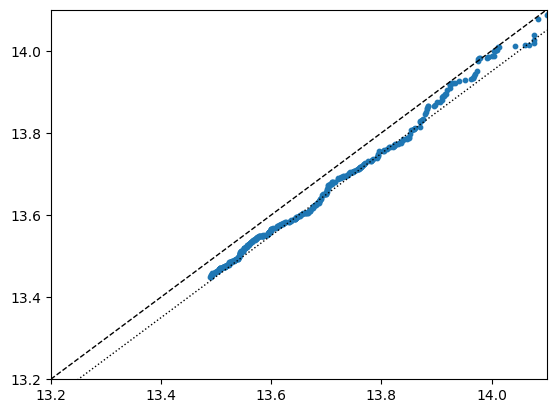

In [59]:
plt.scatter(np.log10(hal_rs_sel.Mvir.iloc[-400:]), np.log10(hal_vr_sel.Mass_BN98.iloc[-400:]), s=10)
plt.xlim(13.2,14.1)
plt.ylim(13.2,14.1)
plt.plot(np.linspace(13.2,14.1,10),np.linspace(13.2,14.1,10),'k--', lw=1)
plt.plot(np.linspace(13.2,14.1,10),np.linspace(13.2,14.1,10)-0.05,'k:', lw=1)

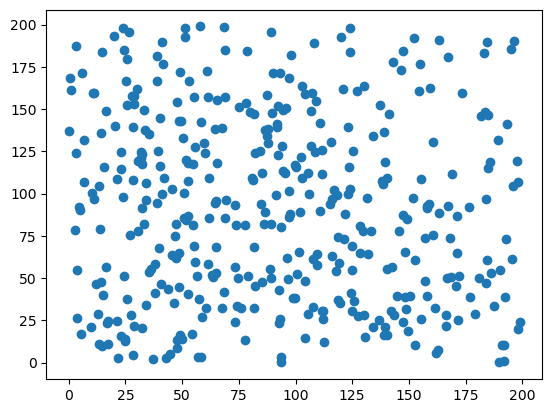

In [60]:
plt.scatter(hal_rs_sel.X.iloc[-400:], hal_vr_sel.Xc.iloc[-400:])

<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

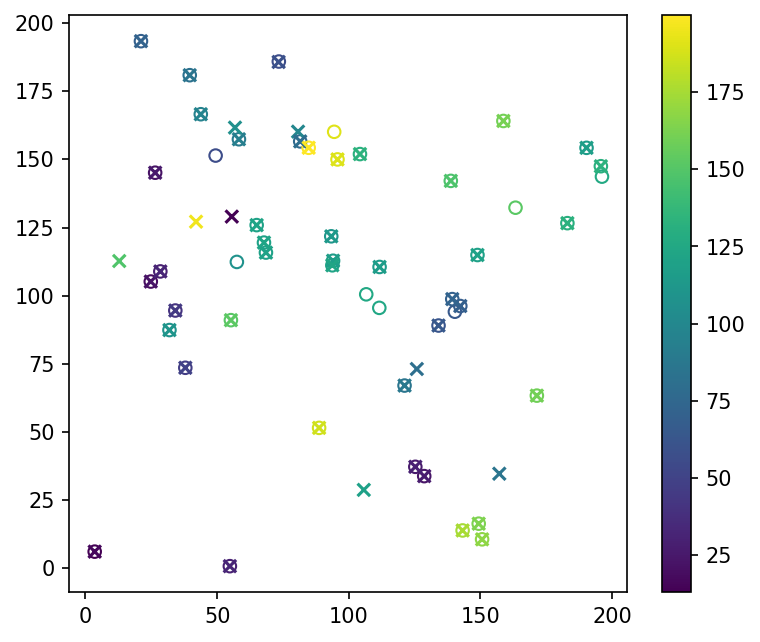

In [61]:
plt.figure(dpi=150, figsize=(5*1.2,5))
g = plt.scatter(hal_rs_sel.X[-50:], hal_rs_sel.Y[-50:], c=hal_rs_sel.Z[-50:], marker='o')
plt.scatter(hal_vr_sel.Xcmbp[-50:], hal_vr_sel.Ycmbp[-50:], c=hal_vr_sel.Zcmbp[-50:], marker='x')
g.set_facecolor('none')
plt.colorbar()
plt.scatter

In [62]:
hal_rs_sel.kin_rat.mean()

1.3505603724780135

In [63]:
hal_vr_sel.kin_rat.mean()

1.4161781152085786

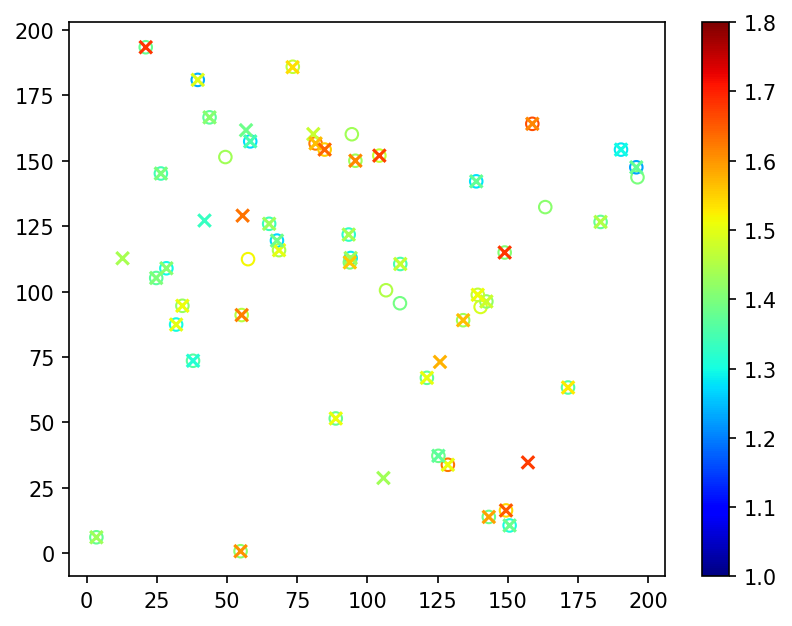

In [64]:
plt.figure(dpi=150, )
g = plt.scatter(hal_rs_sel.X[-50:], hal_rs_sel.Y[-50:], c=hal_rs_sel.kin_rat[-50:], marker='o', cmap='jet', vmin=1,vmax=1.8)
plt.scatter(hal_vr_sel.Xcmbp[-50:], hal_vr_sel.Ycmbp[-50:], c=hal_vr_sel.kin_rat[-50:], marker='x', cmap='jet', vmin=1,vmax=1.8)
g.set_facecolor('none')
plt.colorbar()

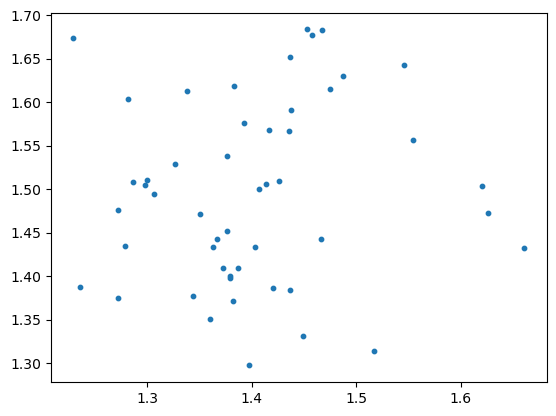

In [65]:
plt.scatter(hal_rs_sel.kin_rat.iloc[-50:], hal_vr_sel.kin_rat.iloc[-50:], s=10)
# plt.xlim(13.2,14.1)
# plt.ylim(13.2,14.1)
# plt.plot(np.linspace(13.2,14.1,10),np.linspace(13.2,14.1,10),'k--', lw=1)
# plt.plot(np.linspace(13.2,14.1,10),np.linspace(13.2,14.1,10)-0.05,'k:', lw=1)

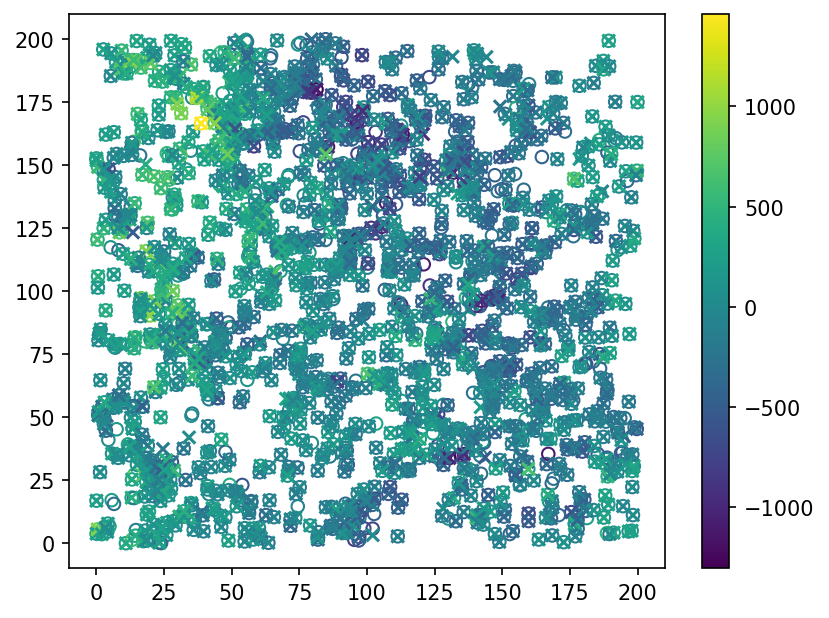

In [66]:
plt.figure(dpi=150)
g = plt.scatter(hal_rs_sel.X, hal_rs_sel.Y, c=hal_rs_sel.VX, marker='o')
plt.scatter(hal_vr_sel.Xcmbp, hal_vr_sel.Ycmbp, c=hal_vr_sel.VXcmbp, marker='x')
g.set_facecolor('none')
plt.colorbar()

In [67]:
hal_vr_dict.keys()

dict_keys(['Efrac', 'Ekin', 'Epot', 'ID', 'ID_mbp', 'ID_minpot', 'Krot', 'Lx', 'Lx_200crit', 'Lx_200crit_excl', 'Lx_200mean', 'Lx_200mean_excl', 'Lx_BN98', 'Lx_BN98_excl', 'Ly', 'Ly_200crit', 'Ly_200crit_excl', 'Ly_200mean', 'Ly_200mean_excl', 'Ly_BN98', 'Ly_BN98_excl', 'Lz', 'Lz_200crit', 'Lz_200crit_excl', 'Lz_200mean', 'Lz_200mean_excl', 'Lz_BN98', 'Lz_BN98_excl', 'Mass_200crit', 'Mass_200crit_excl', 'Mass_200mean', 'Mass_200mean_excl', 'Mass_BN98', 'Mass_BN98_excl', 'Mass_FOF', 'Mass_tot', 'Mvir', 'RVmax_Lx', 'RVmax_Ly', 'RVmax_Lz', 'RVmax_eig_xx', 'RVmax_eig_xy', 'RVmax_eig_xz', 'RVmax_eig_yx', 'RVmax_eig_yy', 'RVmax_eig_yz', 'RVmax_eig_zx', 'RVmax_eig_zy', 'RVmax_eig_zz', 'RVmax_lambda_B', 'RVmax_q', 'RVmax_s', 'RVmax_sigV', 'RVmax_veldisp_xx', 'RVmax_veldisp_xy', 'RVmax_veldisp_xz', 'RVmax_veldisp_yx', 'RVmax_veldisp_yy', 'RVmax_veldisp_yz', 'RVmax_veldisp_zx', 'RVmax_veldisp_zy', 'RVmax_veldisp_zz', 'R_200crit', 'R_200crit_excl', 'R_200mean', 'R_200mean_excl', 'R_BN98', 'R_BN98

In [68]:
# hal_rs

In [69]:
hal_rs_sel[['X','Y','Z']]

X          Y          Z
#ID                                     
1289446  132.22542   80.13563   64.24346
1042661  112.78874   37.41802   62.49562
620350    78.06509  111.51319  121.06744
432173     9.96588   57.10042  163.23792
864693    91.23793  196.86464  102.69350
...            ...        ...        ...
798049    43.79107  166.57388   97.24488
1587144  111.68231  110.53323  116.59005
1586360  182.99590  126.60458  132.27176
1283962  134.07132   89.04338   64.75892
249207    34.11645   94.55351   44.43104

[1933 rows x 3 columns]

In [70]:
# hal_rs.columns[1:4]

In [71]:
# inds = hal_vr_sel.index[:10]

In [72]:
# inds.drop(inds[4])

In [73]:
# inds

In [74]:
# inds.shape

In [75]:
# hal_rs_sel

In [76]:
# def find_match(hal_vr_each, hal_rs):
#     hal_rs_near = hal_rs[['X','Y','Z','VX','VY','VZ','Rvir']].copy()
#     hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.X-hal_vr_each.Xc)<hal_vr_each.R_BN98]
#     hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.Y-hal_vr_each.Yc)<hal_vr_each.R_BN98]
#     hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.Z-hal_vr_each.Zc)<hal_vr_each.R_BN98]
#     if match_vel==True:
#         hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.VX-hal_vr_each.VXc)<np.abs(hal_vr_each.VXc)]
#         hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.VY-hal_vr_each.VYc)<np.abs(hal_vr_each.VYc)]
#         hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.VZ-hal_vr_each.VZc)<np.abs(hal_vr_each.VZc)]
#     if hal_rs_near.shape[0]!=0:
#         hal_rs_near['rel_size'] = np.abs(np.log(hal_rs_near.Rvir/1e3/hal_vr_each.R_BN98))
#         return hal_rs_near.rel_size.idxmin()
    

In [77]:
def cross_match(hal_vr, hal_rs, match_vel=True):
    matched_vr_idx = []
    matched_rs_idx = []
    for hal_vr_each in hal_vr.itertuples():
#         print(hal_vr_each.Xc)
        hal_rs_near = hal_rs[['X','Y','Z','VX','VY','VZ','Rvir']].copy()
        hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.X-hal_vr_each.Xc)<hal_vr_each.R_BN98]
        hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.Y-hal_vr_each.Yc)<hal_vr_each.R_BN98]
        hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.Z-hal_vr_each.Zc)<hal_vr_each.R_BN98]
        if match_vel==True:
            hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.VX-hal_vr_each.VXc)<np.abs(hal_vr_each.VXc)]
            hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.VY-hal_vr_each.VYc)<np.abs(hal_vr_each.VYc)]
            hal_rs_near = hal_rs_near.loc[np.abs(hal_rs_near.VZ-hal_vr_each.VZc)<np.abs(hal_vr_each.VZc)]
        if hal_rs_near.shape[0]!=0:
            hal_rs_near['rel_size'] = np.abs(np.log(hal_rs_near.Rvir/1e3/hal_vr_each.R_BN98))
            matched_rs_idx.append(hal_rs_near.rel_size.idxmin())
            matched_vr_idx.append(hal_vr_each.Index)
    return pd.DataFrame(data={'vr':matched_vr_idx,'rs':matched_rs_idx})

In [78]:
%load_ext autoreload
%autoreload 0

In [79]:
from find_match_halo import cross_match, cross_match_metric, cross_match_old

In [80]:
hal_vr_sel.iloc[3].index

Index(['Efrac', 'Ekin', 'Epot', 'ID_mbp', 'ID_minpot', 'Krot', 'Lx',
       'Lx_200crit', 'Lx_200crit_excl', 'Lx_200mean',
       ...
       'veldisp_xx', 'veldisp_xy', 'veldisp_xz', 'veldisp_yx', 'veldisp_yy',
       'veldisp_yz', 'veldisp_zx', 'veldisp_zy', 'veldisp_zz', 'kin_rat'],
      dtype='object', length=154)

In [81]:
hal_rs_sel = hal_rs.loc[hal_rs.Mvir>8e12].sort_values('Mvir').iloc[-500:]
hal_vr_sel = hal_vr.loc[hal_vr.Mass_BN98>8e12].sort_values('Mass_BN98').iloc[-500:]

In [82]:
hal_rs_sel.Rvir.min()

714.43

In [83]:
np.where(hal_vr_all.R_BN98<0)

(array([], dtype=int64),)

In [84]:
t_now = time()
match_idx_3d = cross_match_old(hal_vr_sel[:], hal_rs_sel[:], dist_fac=5, match_vel=False)
print(match_idx_3d.shape)
t_bef, t_now = t_now, time()
print(t_now-t_bef)

0.002409696578979492 kdtree constructed
0.004781484603881836 query done for spatial neighbours
8.106231689453125e-05
(417, 2)
0.49394989013671875


In [85]:
period_boxsize = round(config['Period']/ a * config['h_val'])

In [86]:
t_now = time()
match_idx_6d = cross_match_metric(hal_vr_sel, hal_rs_sel, box_size=period_boxsize, dist_fac=3, metric_vel=0.001, metric_lograd=20)
print(match_idx_6d.shape)
t_bef, t_now = t_now, time()
print(t_now-t_bef)

0.003180265426635742 kdtree constructed
0.03267025947570801 query done for spatial neighbours
0.0004730224609375
(410, 2)
0.037987709045410156


In [67]:
hal_vr_matched = hal_vr_sel.loc[match_idx_3d['vr']]
hal_rs_matched = hal_rs_sel.loc[match_idx_3d['rs']]

In [68]:
hal_vr_matched = hal_vr_sel.loc[match_idx_6d['vr']]
hal_rs_matched = hal_rs_sel.loc[match_idx_6d['rs']]

In [69]:
hal_vr_plot = hal_vr_matched
hal_rs_plot = hal_rs_matched

Text(0, 0.5, 'VELOCIraptor')

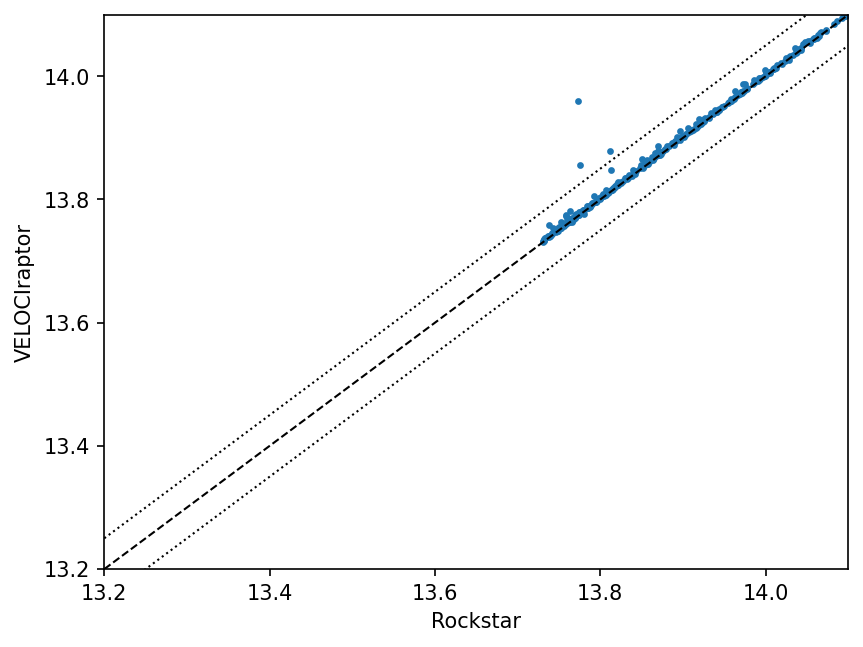

In [70]:
plt.figure(dpi=150)
plt.scatter(np.log10(hal_rs_plot.Mvir), np.log10(hal_vr_plot.Mass_BN98), s=5)
scatrange = (13.2,14.1)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k--', lw=1)
plt.plot(scatranx,scatranx-0.05,'k:', lw=1)
plt.plot(scatranx,scatranx+0.05,'k:', lw=1)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

Text(0, 0.5, 'VELOCIraptor')

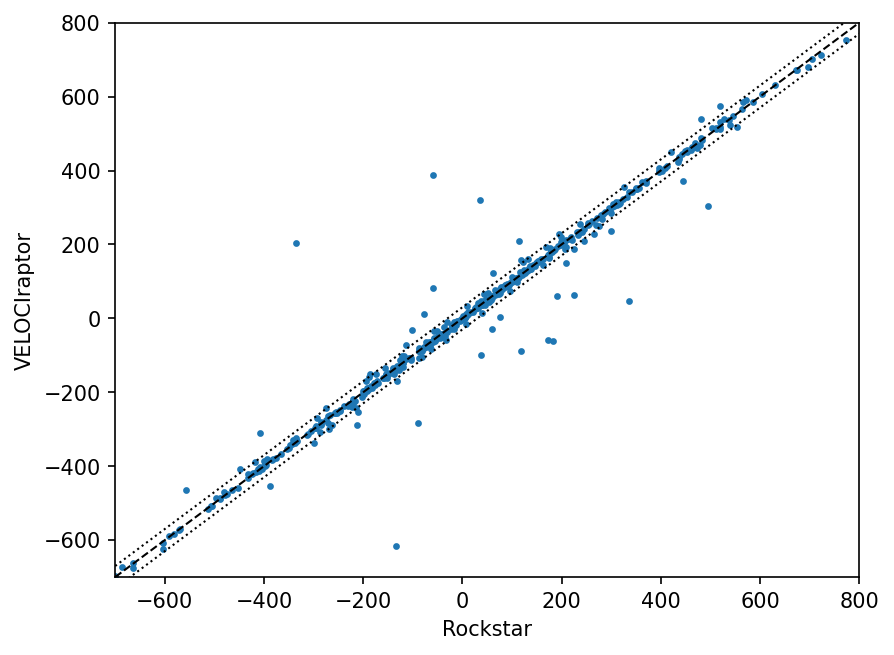

In [71]:
plt.figure(dpi=150)
plt.scatter(hal_rs_plot.VX, hal_vr_plot.VXc, s=5)
scatrange = (-700,800)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k--', lw=1)
plt.plot(scatranx,scatranx-30,'k:', lw=1)
plt.plot(scatranx,scatranx+30,'k:', lw=1)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

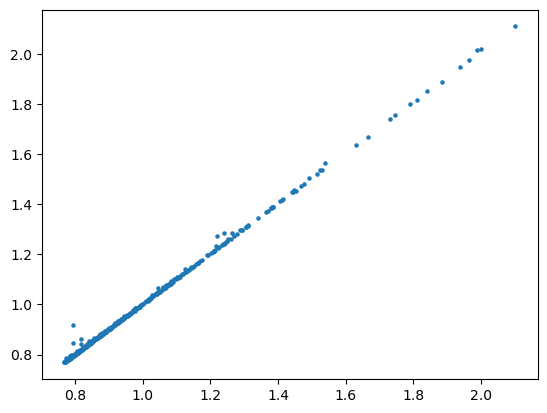

In [72]:
plt.scatter(hal_rs_plot.Rvir*1e-3, hal_vr_plot.R_BN98, s=5)

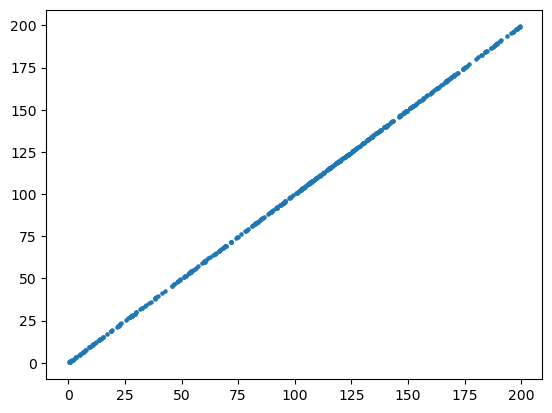

In [73]:
plt.scatter(hal_rs_plot.Z, hal_vr_plot.Zc, s=5)

In [74]:
# 1.5*72(15*2*8/160*72)**2

In [75]:
scale_r = 2

2.6784000000000003

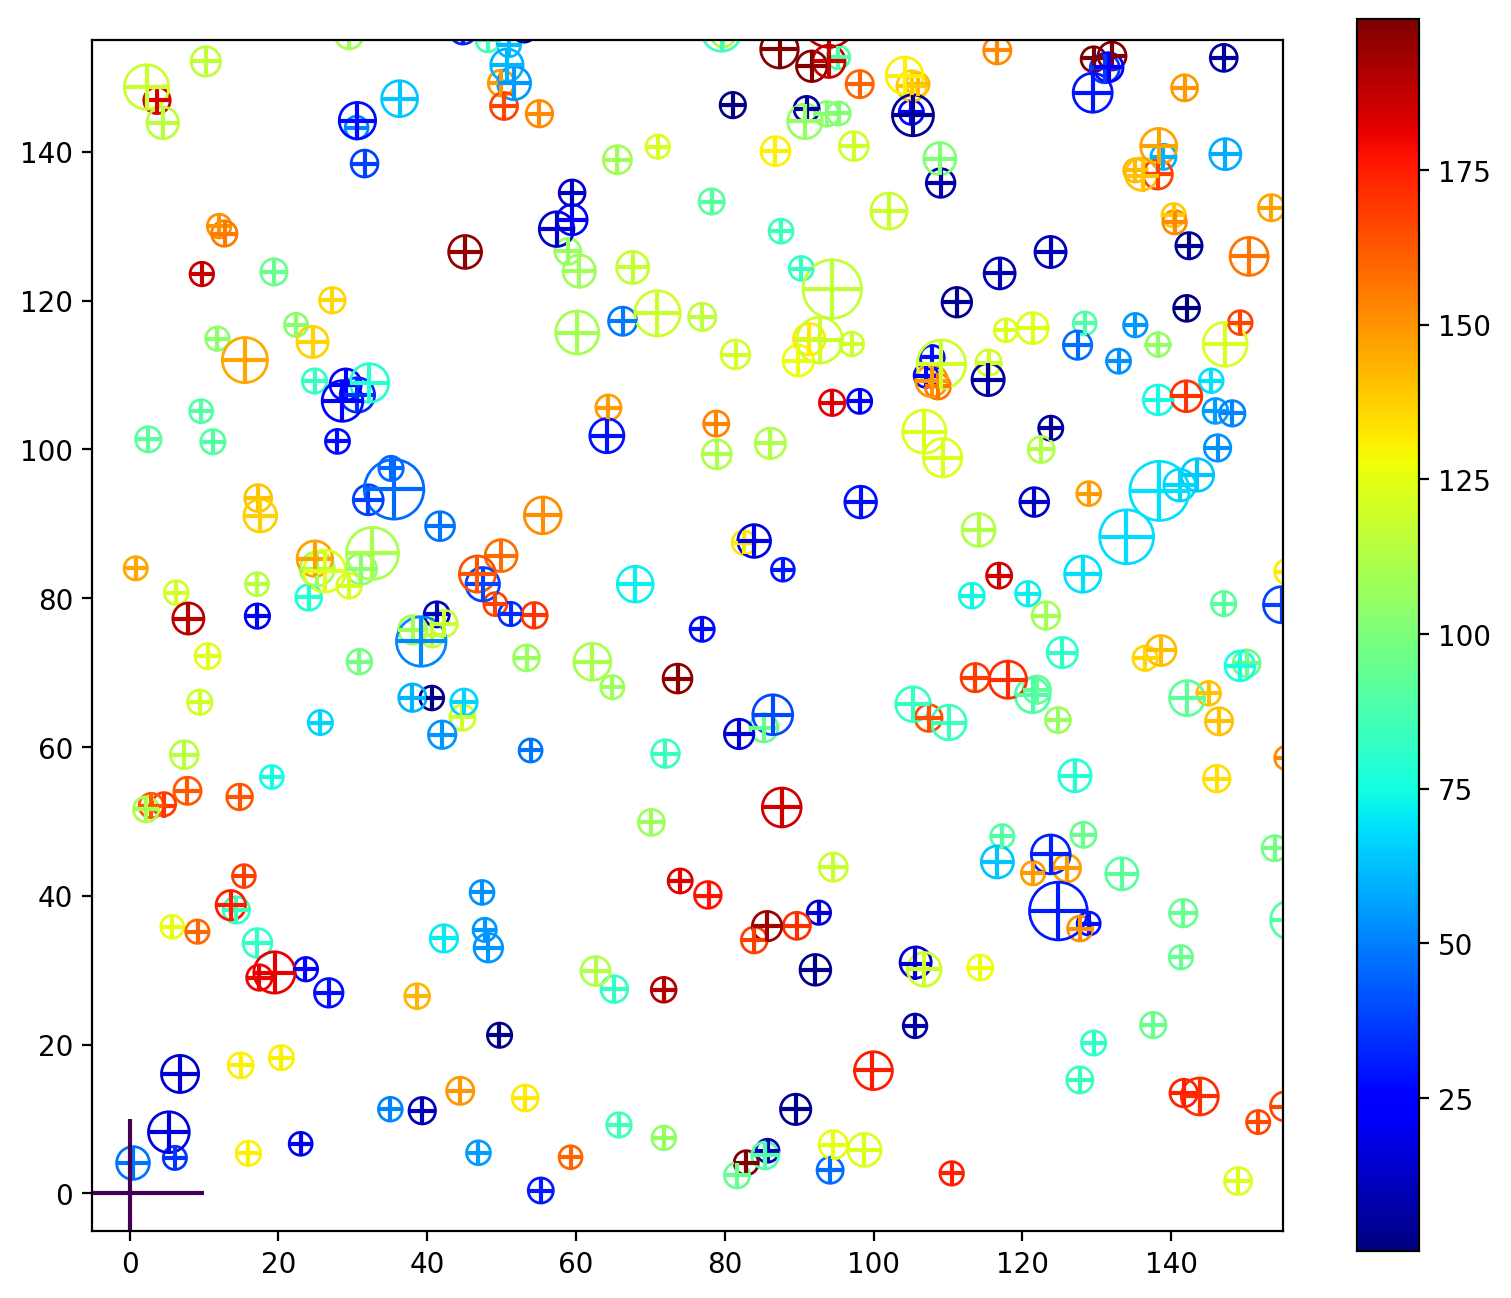

In [76]:
fig, ax1 = plt.subplots(1, dpi=200, figsize=(8*1.2,8))
ax1.set_aspect('equal')
g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c=hal_rs_plot.Z, s=(2.6784*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='o', cmap='jet')
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=hal_vr_plot.Zc, s=(2.6784*2*scale_r*hal_vr_plot.R_BN98)**2, marker='+', cmap='jet')
g1.set_facecolor('none')
g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(2.6784*2*10)**2, marker='+')
g0.set_facecolor('none')
plt.colorbar(g2, ax=ax1)
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)
# print(3*hal_rs_plot.Rvir)

In [77]:
# ax1.get_window_extent().height

2.6784000000000003

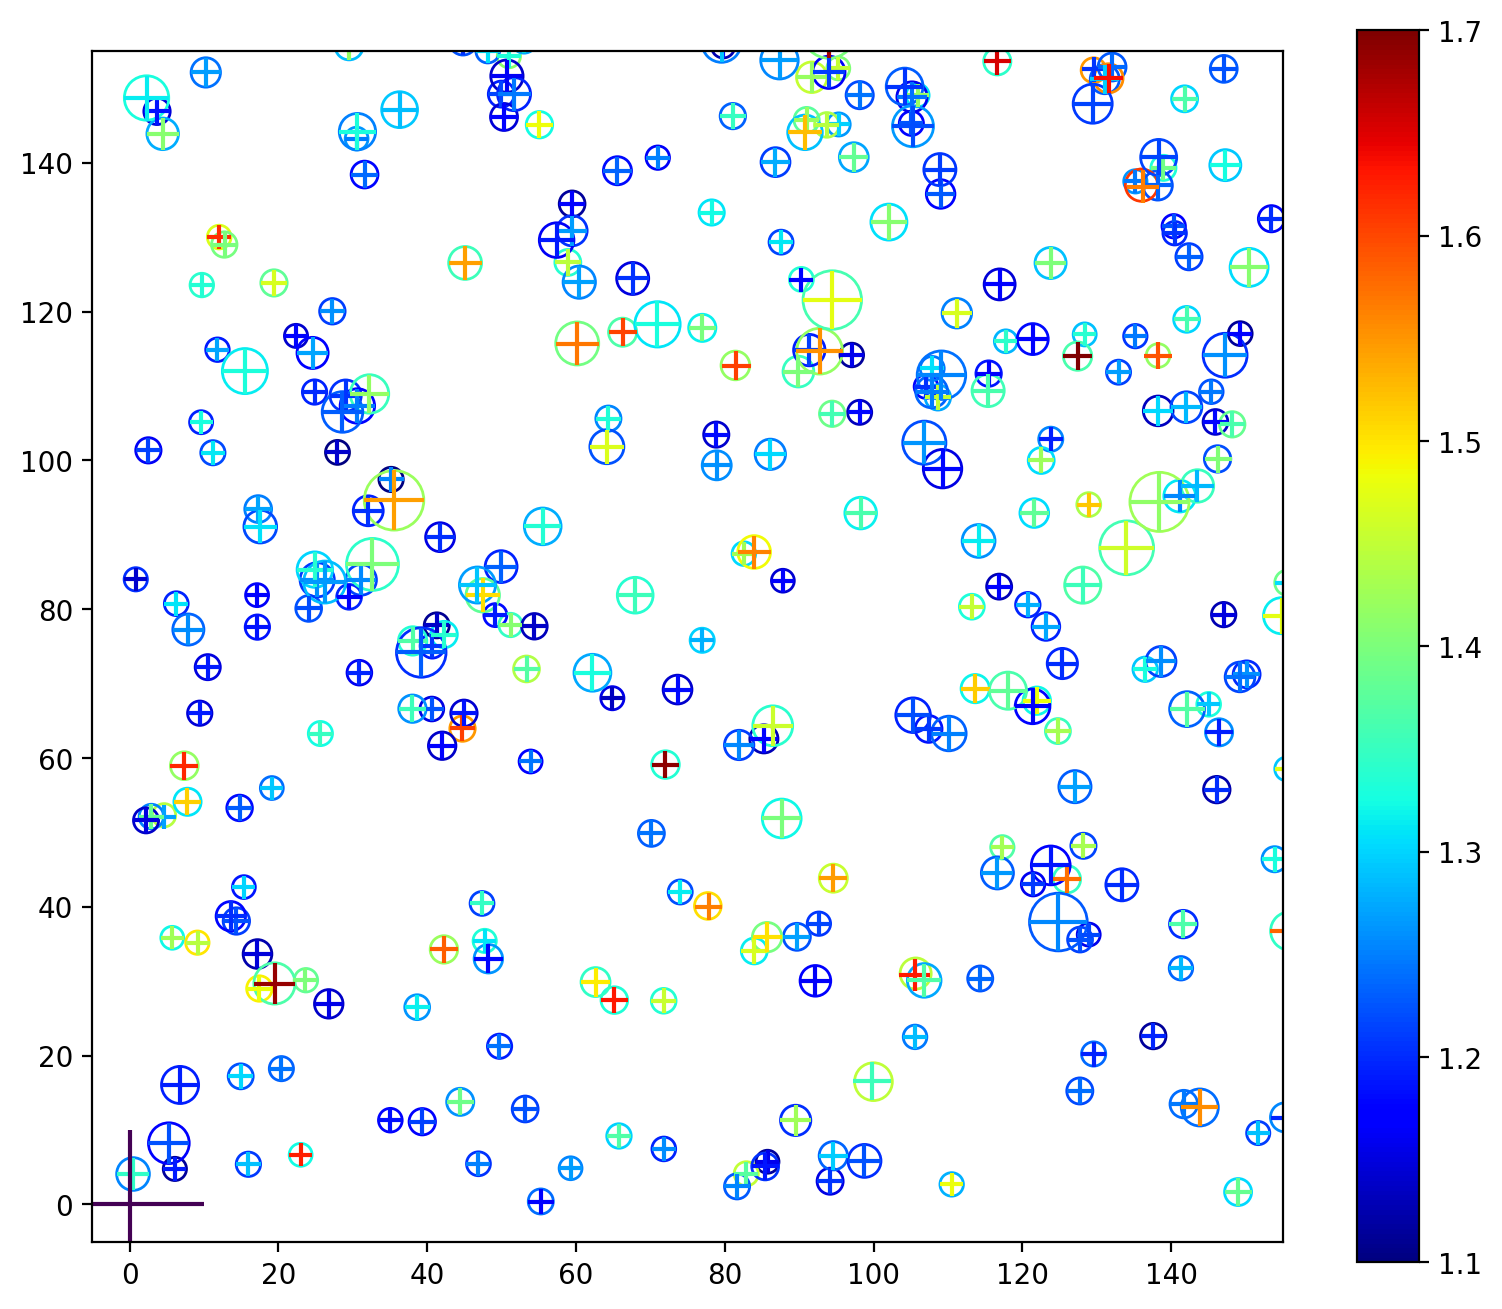

In [78]:
fig, ax1 = plt.subplots(1, dpi=200, figsize=(8*1.2,8))
ax1.set_aspect('equal')
g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c=hal_rs_plot.kin_rat, s=(2.6784*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='o', cmap='jet', vmin=1.1,vmax=1.7)
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=hal_vr_plot.kin_rat, s=(2.6784*2*scale_r*hal_vr_plot.R_BN98)**2, marker='+', cmap='jet', vmin=1.1,vmax=1.7)
g1.set_facecolor('none')
g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(2.6784*2*10)**2, marker='+')
g0.set_facecolor('none')
plt.colorbar(g2, ax=ax1)
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)

In [79]:
# np.array(hal_rs_plot.kin_rat)/np.array(hal_vr_plot.kin_rat)

In [80]:
scale_r = 6

2.6784000000000003

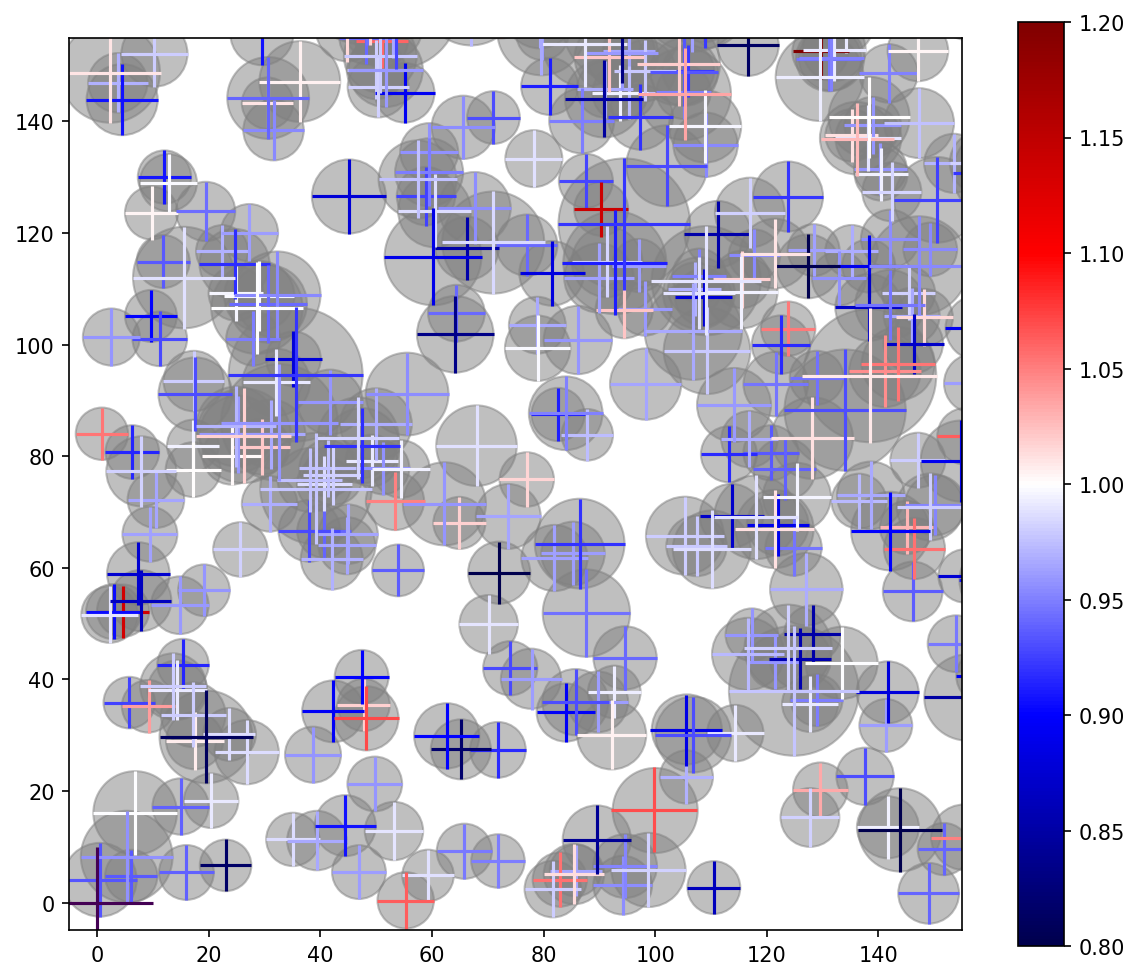

In [81]:
fig, ax1 = plt.subplots(1, dpi=150, figsize=(8*1.2,8))
ax1.set_aspect('equal')
g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c='gray', s=(2.6784*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='o', alpha=0.5)
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=np.array(hal_rs_plot.kin_rat)/np.array(hal_vr_plot.kin_rat), s=(2.6784*2*scale_r*hal_vr_plot.R_BN98)**2, marker='+', cmap='seismic', vmin=0.8,vmax=1.2)
# g1.set_facecolor('none')
g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(2.6784*2*10)**2, marker='+')
g0.set_facecolor('none')
plt.colorbar(g2, ax=ax1)
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)

In [82]:
period_boxsize

200

In [83]:
# hal_vr_all

In [87]:
hal_vr_all.shape, hal_rs_all.shape

((1380515, 154), (1700443, 42))

In [88]:
t_now = time()
match_idx_all = cross_match_metric(hal_vr_all, hal_rs_all, box_size=period_boxsize, dist_fac=3, metric_vel=0.0003, metric_lograd=15)
print(match_idx_all.shape)
t_bef, t_now = t_now, time()
print(t_now-t_bef)

1.3520052433013916 kdtree constructed
0.4789438247680664 query done for spatial neighbours
0.026413440704345703
(957410, 2)
1.8645670413970947


In [89]:
(145591, 2)
2058.1233174800873

2058.1233174800873

In [87]:
match_idx_all.to_hdf(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}.crossmatch", key='idx')

In [88]:
f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}.crossmatch"

'/scratch/cprem/sims/L200_N1024_Cp18/r1/halos_vr_6d/out_200.crossmatch'

In [89]:
match_idx_all = pd.read_hdf(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}.crossmatch", key='idx')

In [90]:
type(match_idx_all)

pandas.core.frame.DataFrame

In [91]:
match_frac_all = match_idx_all.shape[0]/hal_vr_all.shape[0]

In [92]:
match_frac_all

0.6935165499831585

In [93]:
# match_idx_all.set_index('vr')

In [94]:
# hal_vr_matched_all.reset_index()

In [95]:
hal_vr_matched_all = hal_vr_all.loc[match_idx_all['vr']]
hal_rs_matched_all = hal_rs_all.loc[match_idx_all['rs']]

In [96]:
match_idx_all_spl = match_idx_all.sample(1000, random_state=20)
hal_vr_matched = hal_vr_all.loc[match_idx_all_spl['vr']]
hal_rs_matched = hal_rs_all.loc[match_idx_all_spl['rs']]

In [97]:
hal_vr_plot = hal_vr_matched
hal_rs_plot = hal_rs_matched

Text(0, 0.5, 'VELOCIraptor')

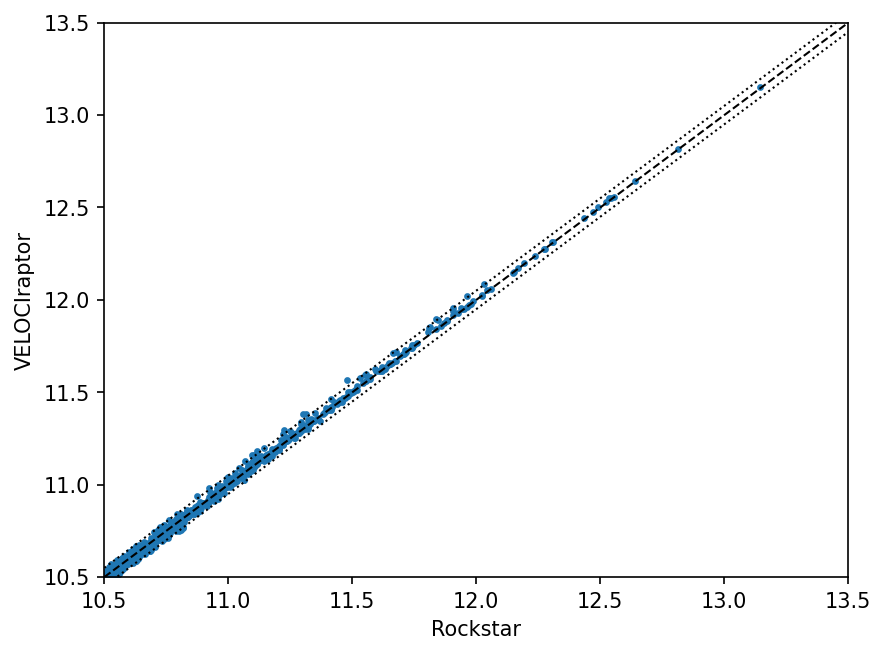

In [98]:
plt.figure(dpi=150)
plt.scatter(np.log10(hal_rs_plot.Mvir), np.log10(hal_vr_plot.Mass_BN98), s=5)
scatrange = (10.5,13.5)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k--', lw=1)
plt.plot(scatranx,scatranx-0.05,'k:', lw=1)
plt.plot(scatranx,scatranx+0.05,'k:', lw=1)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

Text(0, 0.5, 'VELOCIraptor')

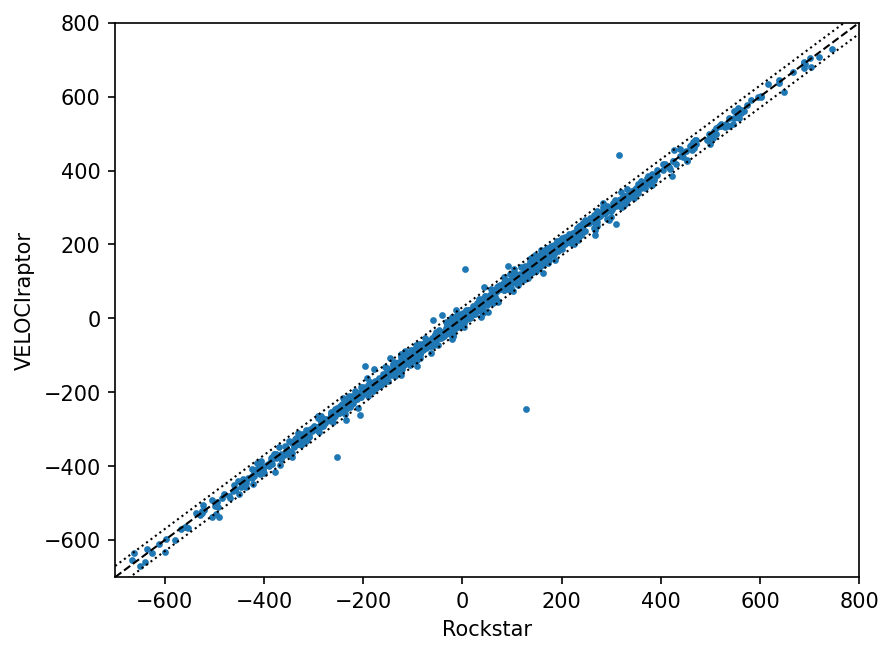

In [99]:
plt.figure(dpi=150)
plt.scatter(hal_rs_plot.VX, hal_vr_plot.VXc, s=5)
scatrange = (-700,800)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k--', lw=1)
plt.plot(scatranx,scatranx-30,'k:', lw=1)
plt.plot(scatranx,scatranx+30,'k:', lw=1)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

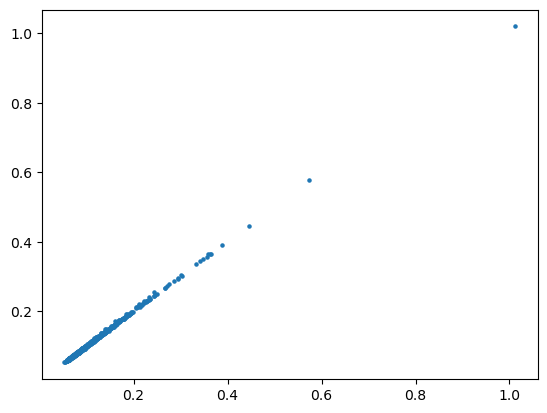

In [100]:
plt.scatter(hal_rs_plot.Rvir*1e-3, hal_vr_plot.R_BN98, s=5)

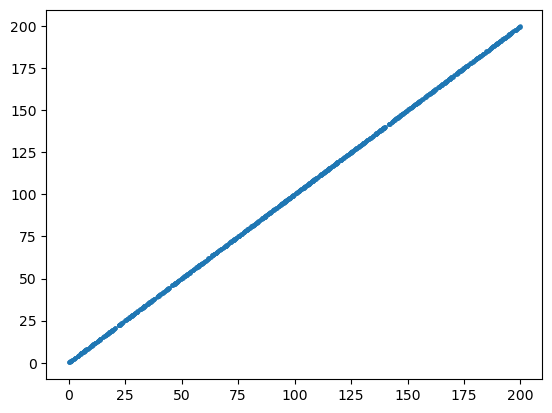

In [101]:
plt.scatter(hal_rs_plot.Z, hal_vr_plot.Zc, s=5)

In [102]:
# 1.5*72(15*2*8/160*72)**2

In [103]:
scale_r = 6

4.0176

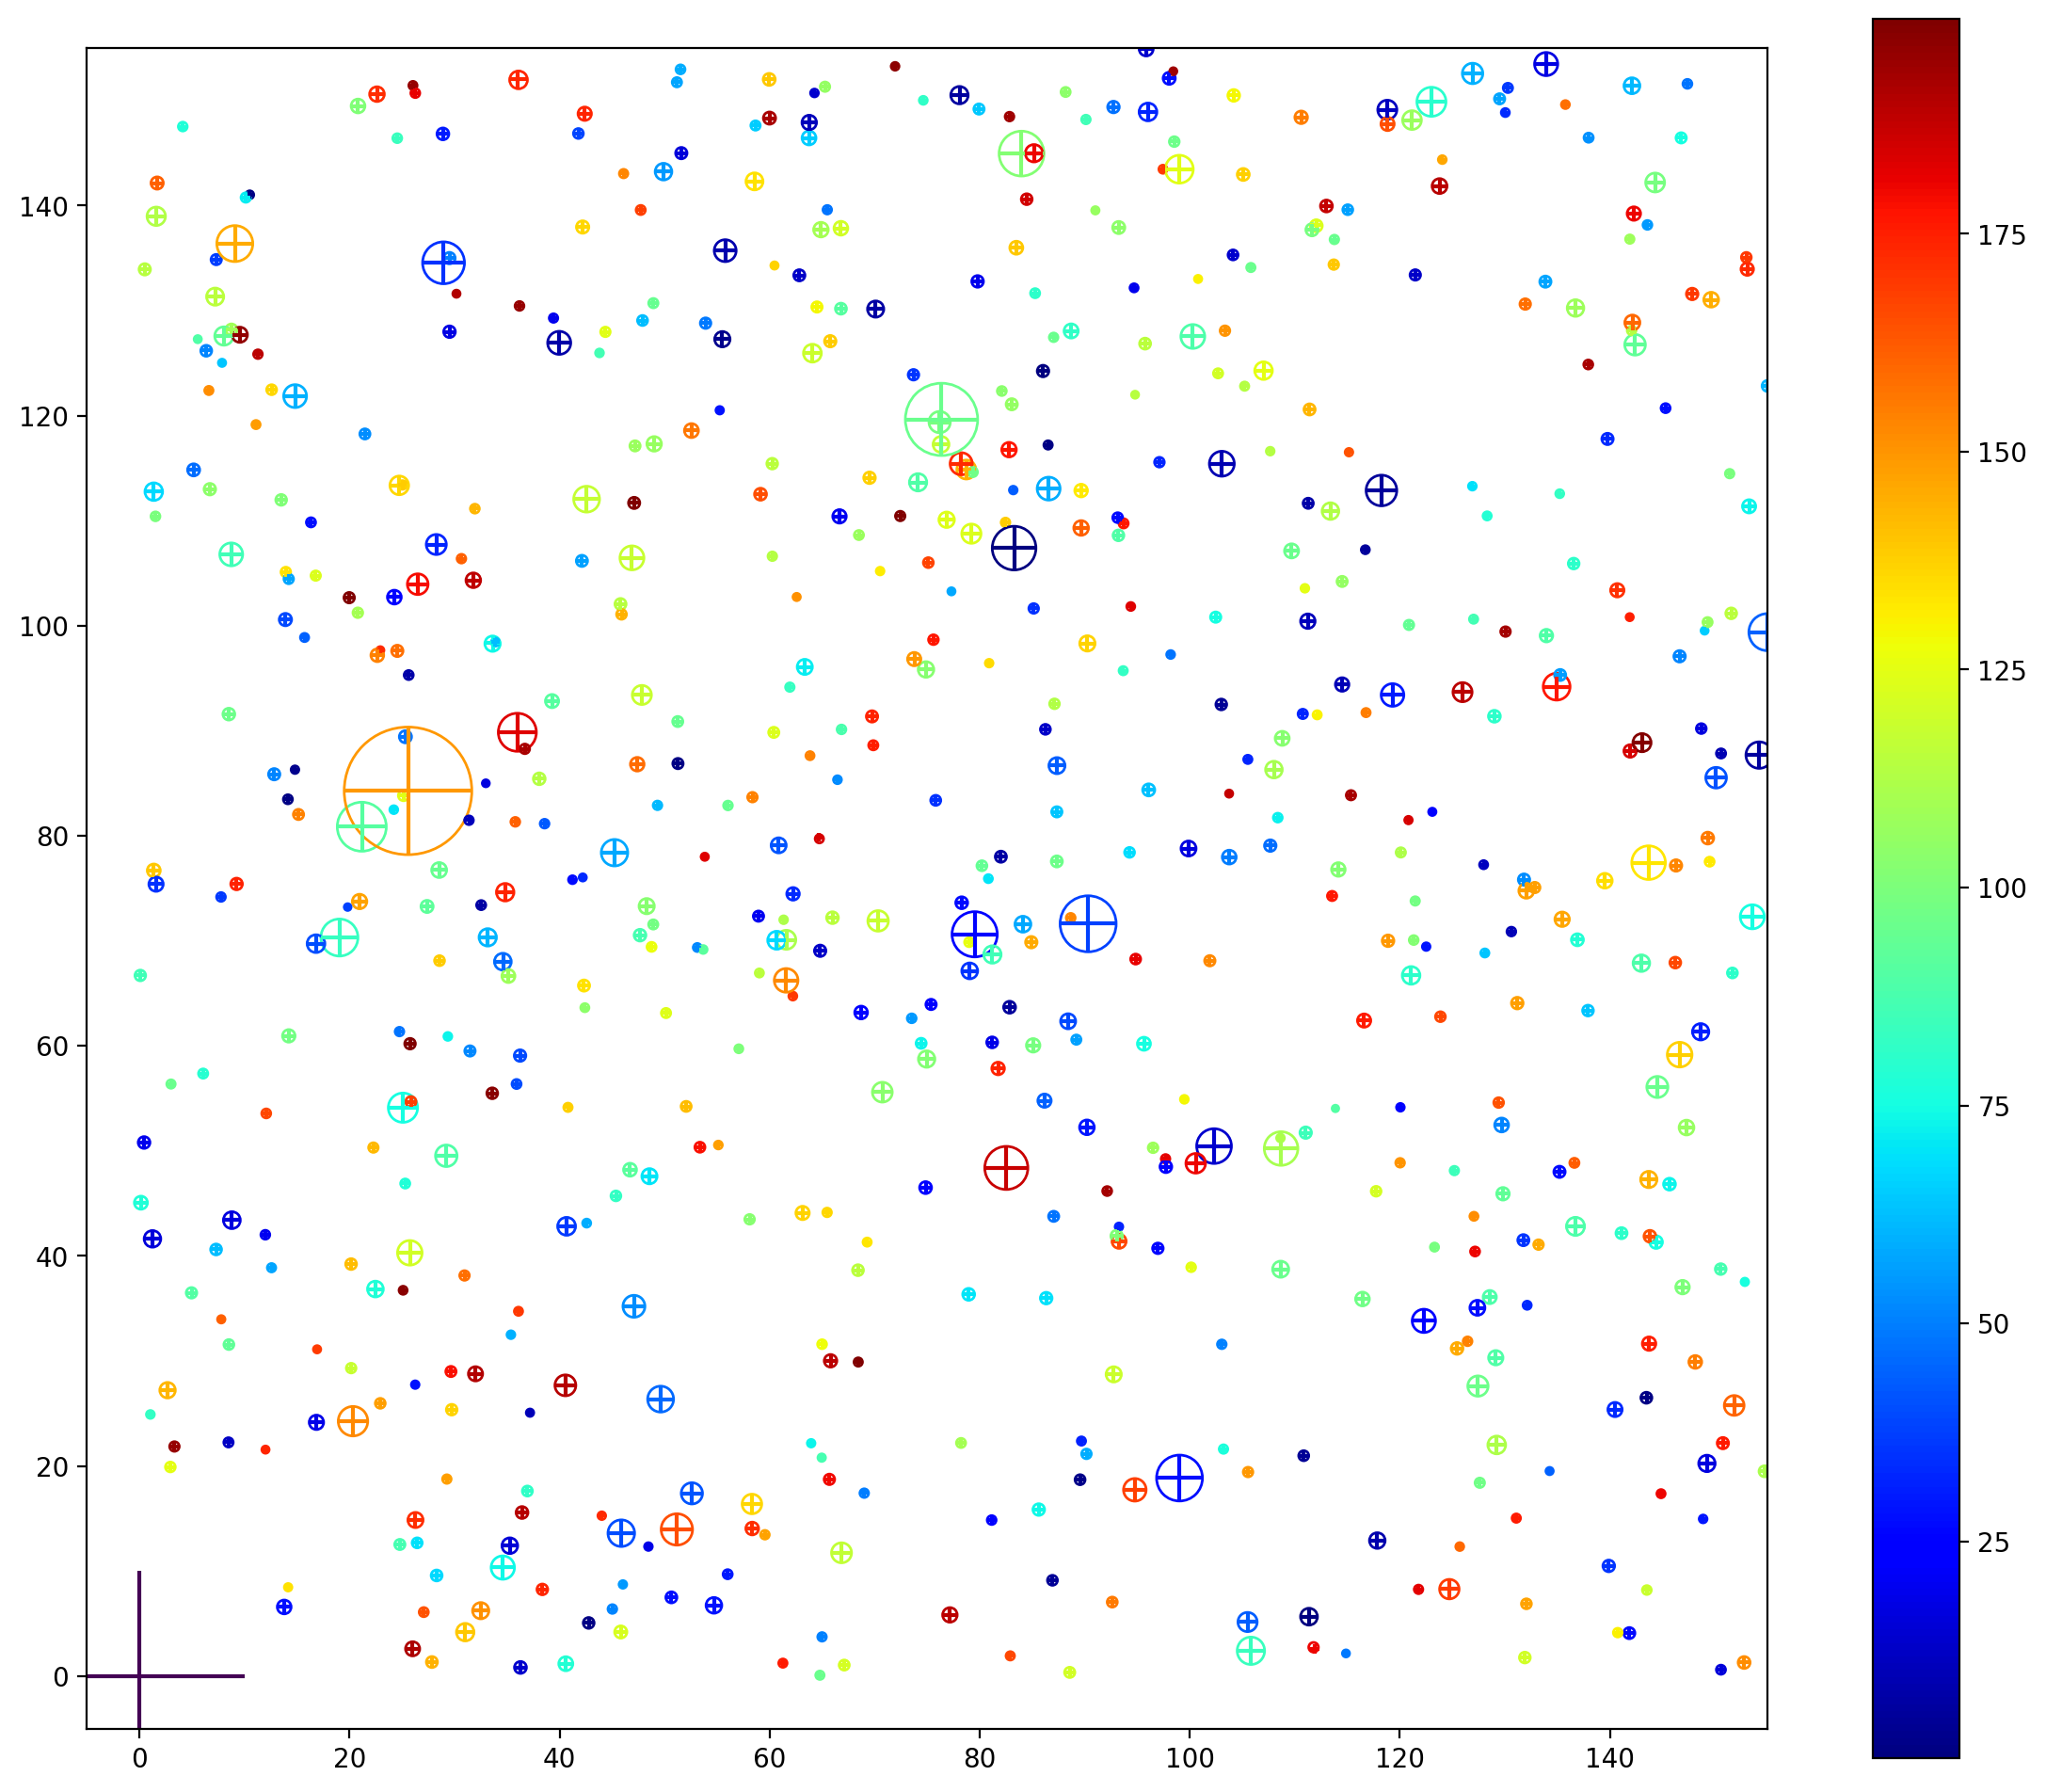

In [104]:
fig, ax1 = plt.subplots(1, dpi=200, figsize=(12*1.2,12))
ax1.set_aspect('equal')
g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c=hal_rs_plot.Z, s=(4.0176*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='o', cmap='jet')
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=hal_vr_plot.Zc, s=(4.0176*2*scale_r*hal_vr_plot.R_BN98)**2, marker='+', cmap='jet')
g1.set_facecolor('none')
g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(4.0176*2*10)**2, marker='+')
g0.set_facecolor('none')
plt.colorbar(g2, ax=ax1)
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)
# print(3*hal_rs_plot.Rvir)

In [105]:
# ax1.get_window_extent().height

4.0176

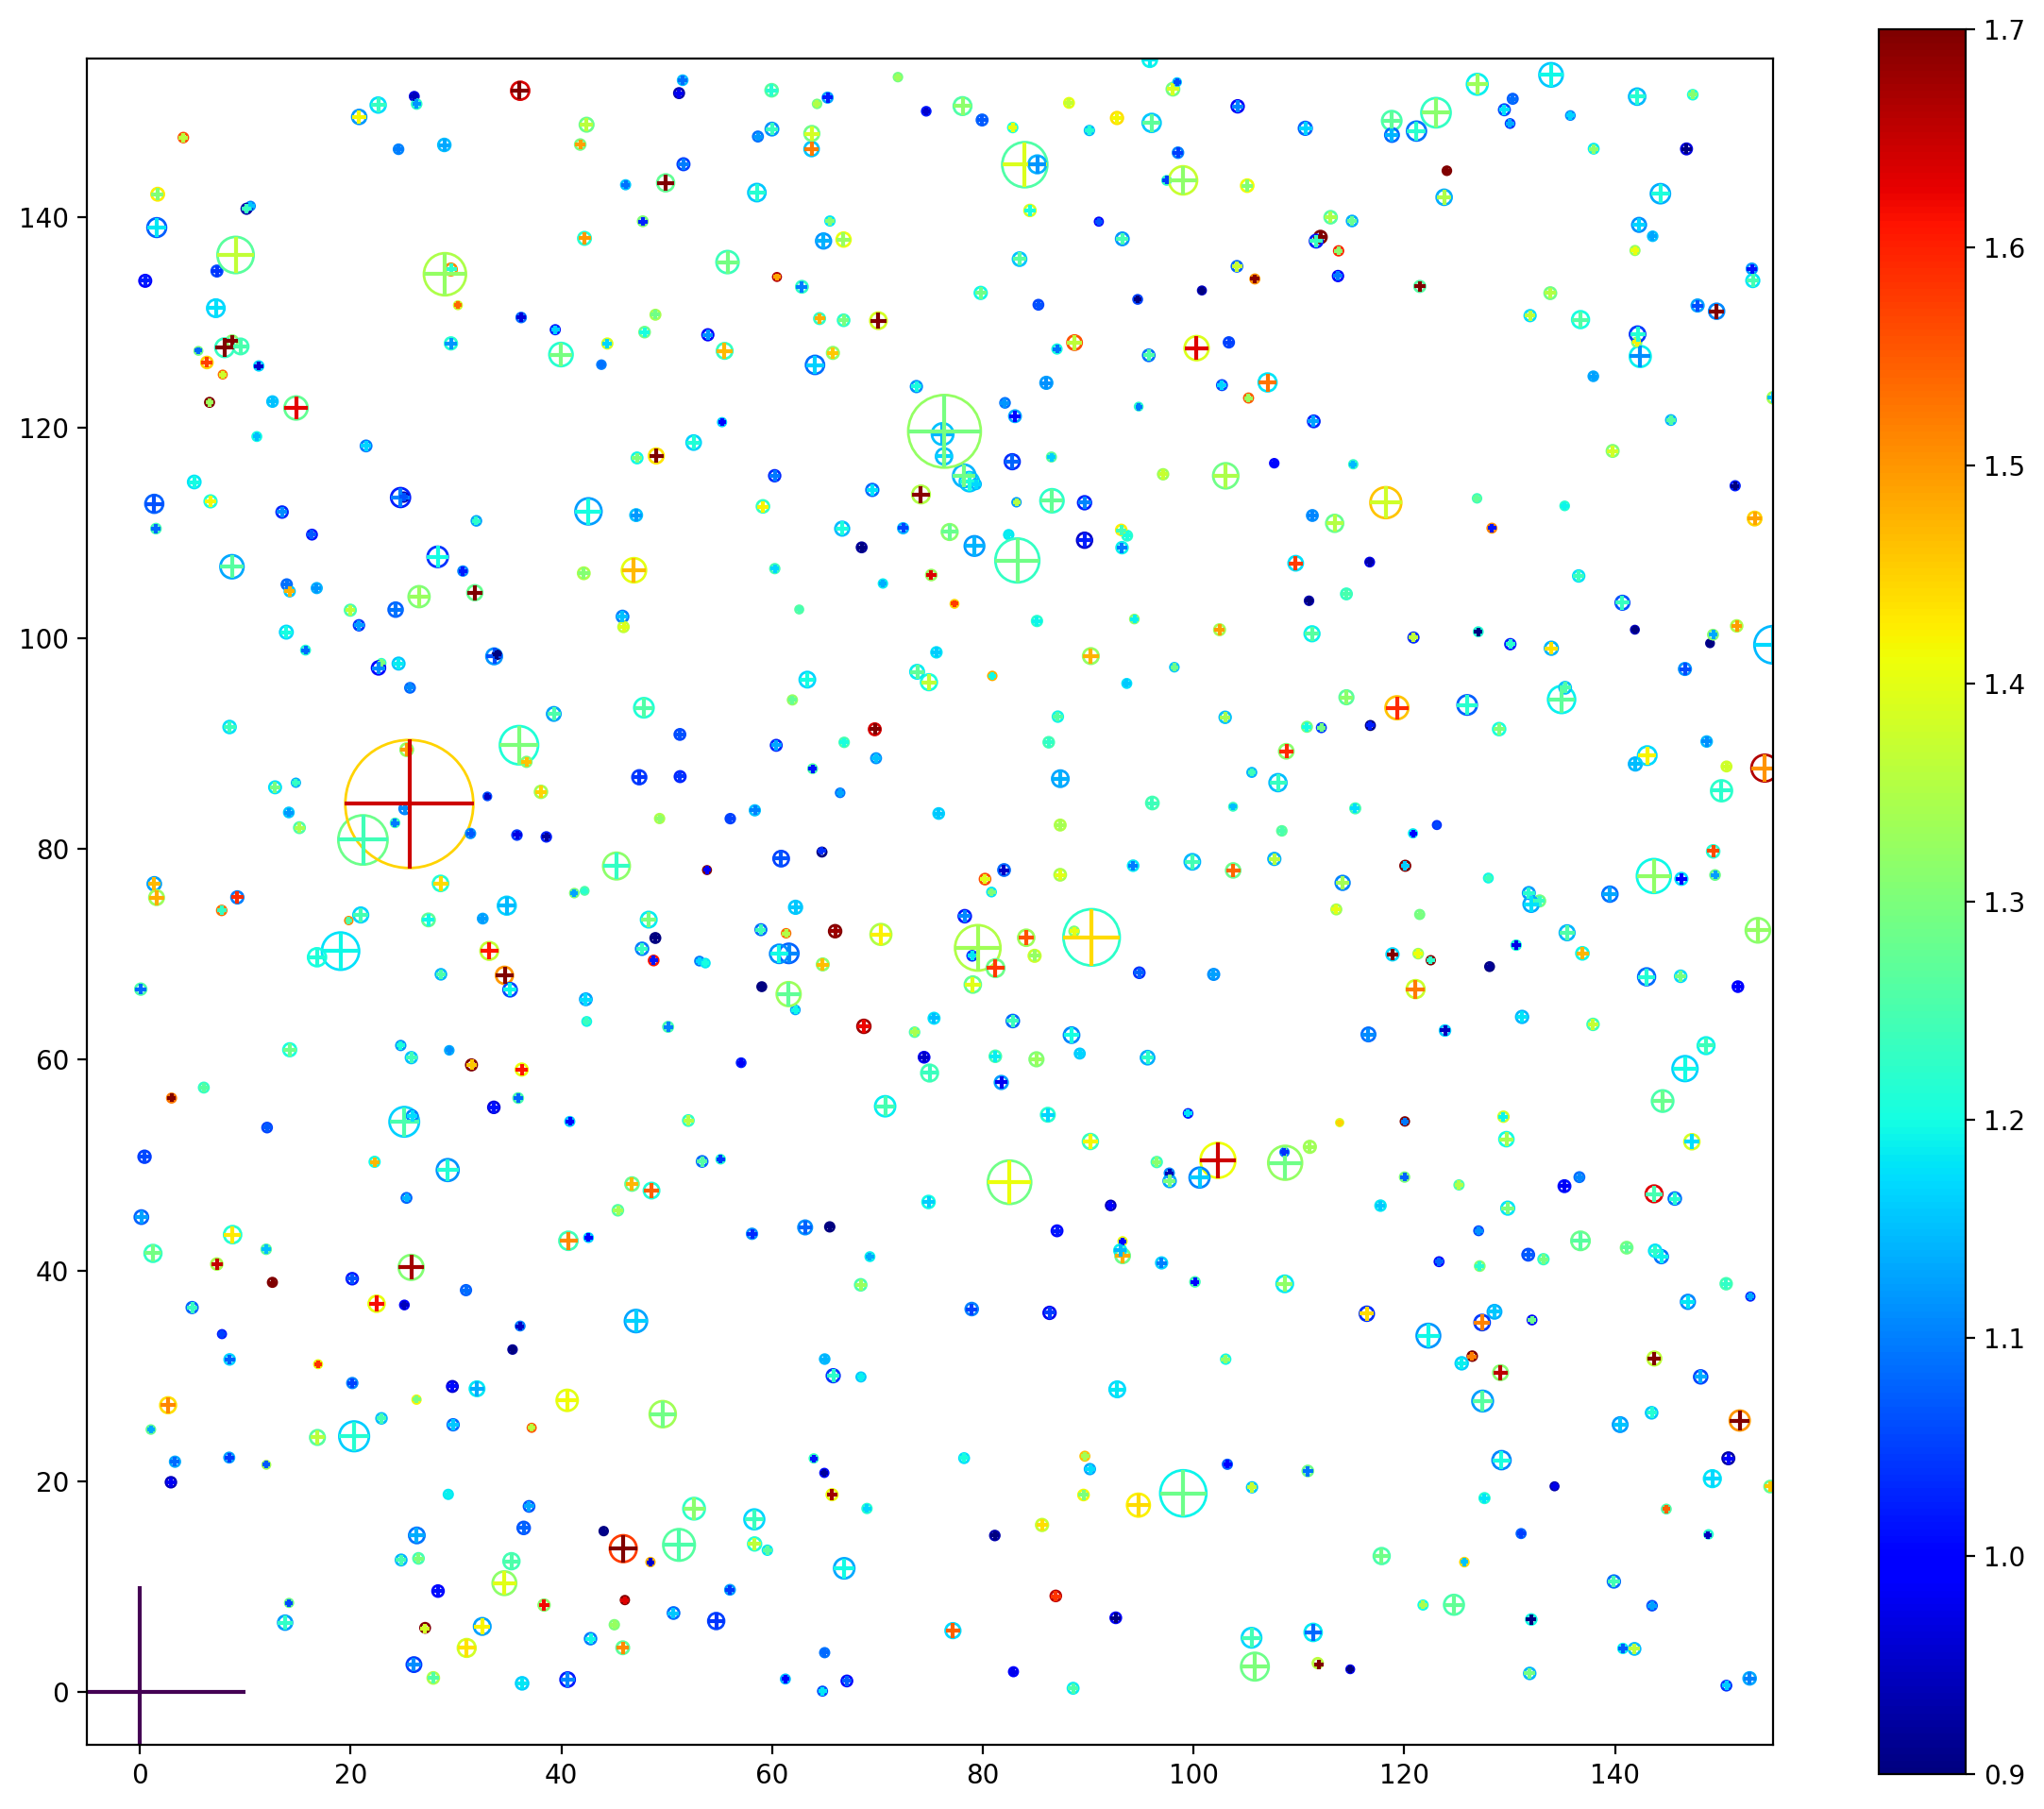

In [106]:
fig, ax1 = plt.subplots(1, dpi=200, figsize=(12*1.2,12))
ax1.set_aspect('equal')
g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c=hal_rs_plot.kin_rat, s=(4.0176*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='o', cmap='jet', vmin=0.9,vmax=1.7)
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=hal_vr_plot.kin_rat, s=(4.0176*2*scale_r*hal_vr_plot.R_BN98)**2, marker='+', cmap='jet', vmin=0.9,vmax=1.7)
g1.set_facecolor('none')
g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(4.0176*2*10)**2, marker='+')
g0.set_facecolor('none')
plt.colorbar(g2, ax=ax1)
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)

In [107]:
scale_r = 6

2.6784000000000003

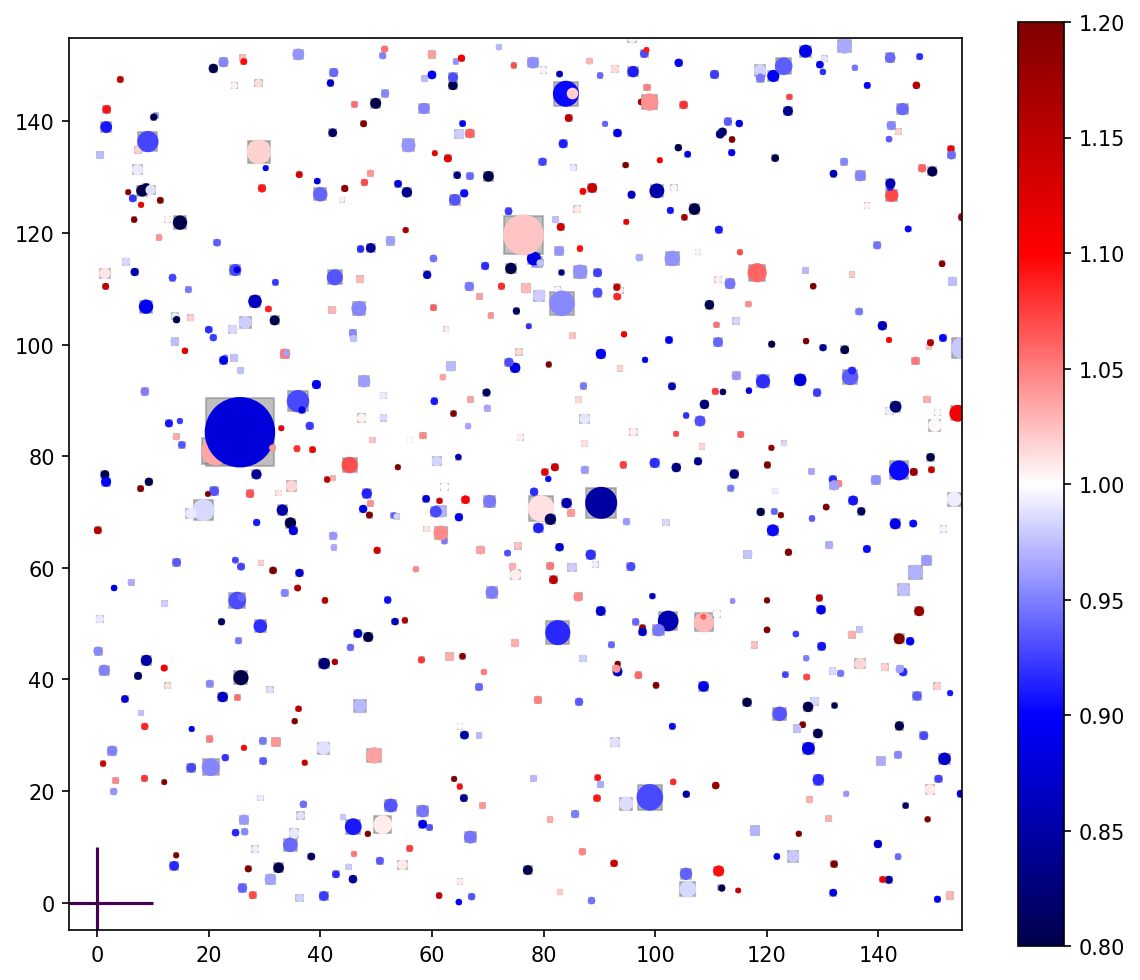

In [108]:
fig, ax1 = plt.subplots(1, dpi=150, figsize=(8*1.2,8))
ax1.set_aspect('equal')
g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c='gray', s=(2.6784*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='s', alpha=0.5)
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=np.array(hal_rs_plot.kin_rat)/np.array(hal_vr_plot.kin_rat), s=(2.6784*2*scale_r*hal_vr_plot.R_BN98)**2, marker='o', cmap='seismic', vmin=0.8,vmax=1.2)
# g1.set_facecolor('none')
# g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(2.6784*2*10)**2, marker='+')
g0.set_facecolor('none')
plt.colorbar(g2, ax=ax1)
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)

Text(0.5, 0, 'RS')

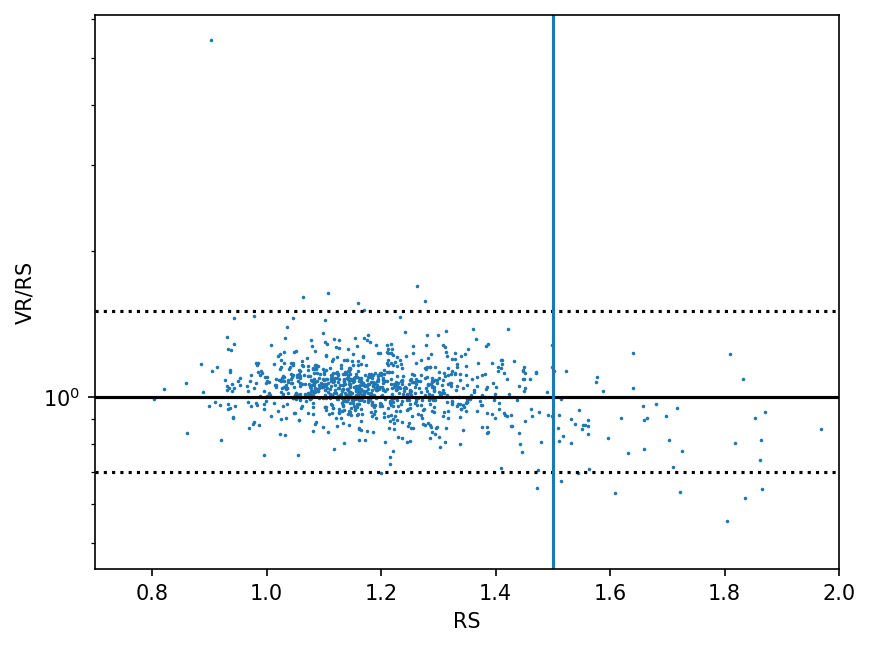

In [109]:
plt.figure(dpi=150)
plt.scatter( hal_rs_plot.kin_rat,np.array(hal_vr_plot.kin_rat)/np.array(hal_rs_plot.kin_rat), s=0.5)
scatrange = (0.7,2)
plt.xlim(*scatrange)
# plt.ylim(*scatrange)
plt.yscale('log')
scatranx = np.linspace(*scatrange,10)
# scatrange = 
# plt.plot(scatranx,scatranx,'k--', lw=1)
# plt.plot(scatranx,scatranx-0.1,'k:', lw=1)
# plt.plot(scatranx,scatranx+0.1,'k:', lw=1)
plt.axhline(1, c='k', ls = '-')
plt.axhline(0.7, c='k', ls=':')
plt.axhline(1.5, c='k', ls=':')
plt.axvline(1.5)
plt.ylabel('VR/RS')
plt.xlabel('RS')

Text(0, 0.5, 'VELOCIraptor')

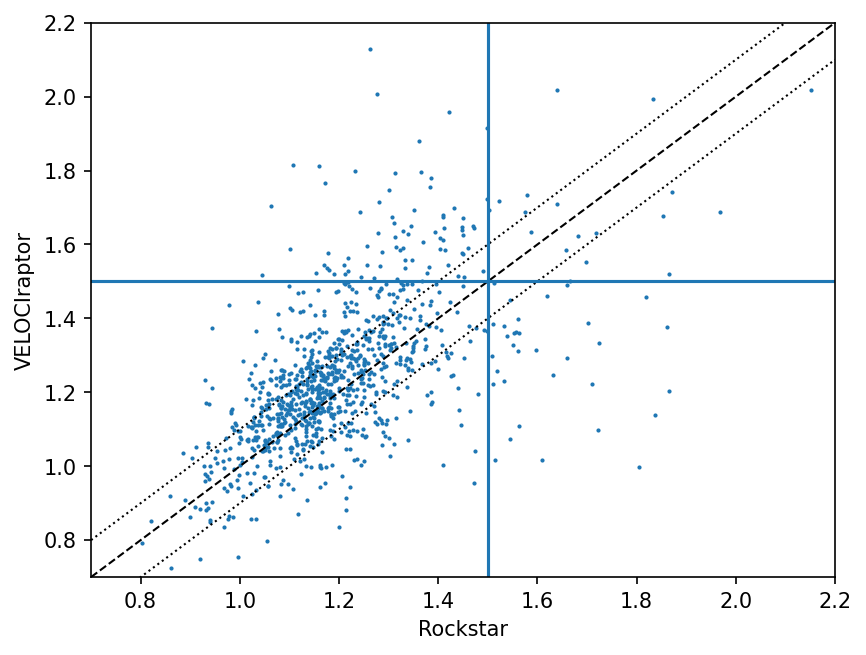

In [110]:
plt.figure(dpi=150)
plt.scatter(hal_rs_plot.kin_rat, hal_vr_plot.kin_rat, s=1)
scatrange = (0.7,2.2)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k--', lw=1)
plt.plot(scatranx,scatranx-0.1,'k:', lw=1)
plt.plot(scatranx,scatranx+0.1,'k:', lw=1)
plt.axvline(1.5)
plt.axhline(1.5)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

In [111]:
hal_vr_sel.shape[0]

500

In [112]:
# hal_rs_sel = hal_rs_all.loc[hal_rs_all.Mvir.between(1e5, 1e11)].sort_values('Mvir')
# hal_vr_sel = hal_vr_all.loc[hal_vr_all.Mass_BN98.between(1e5, 1e11)].sort_values('Mass_BN98').iloc[-500:]

In [113]:
# hal_rs_sel = hal_rs_all.loc[hal_rs_all.Mvir.between(8e11, 8e12)].sort_values('Mvir')
# hal_vr_sel = hal_vr_all.loc[hal_vr_all.Mass_BN98.between(8e11, 8e12)].sort_values('Mass_BN98').iloc[-500:]

In [114]:
# hal_rs_sel = hal_rs_all.loc[hal_rs_all.Mvir.between(1e13, 5e14)].sort_values('Mvir')
# hal_vr_sel = hal_vr_all.loc[hal_vr_all.Mass_BN98.between(1e13, 5e14)].sort_values('Mass_BN98').iloc[-500:]

In [115]:
t_now = time()
match_idx_sel = cross_match_metric(hal_vr_sel, hal_rs_sel, box_size=period_boxsize, dist_fac=3, metric_vel=0.001, metric_lograd=20)
print(match_idx_sel.shape)
t_bef, t_now = t_now, time()
print(t_now-t_bef)

0.0025205612182617188 kdtree constructed
0.004311323165893555 query done for spatial neighbours
0.00024771690368652344
(410, 2)
0.008117914199829102


In [116]:
hal_vr_plot = hal_vr_sel.loc[match_idx_sel['vr']]
hal_rs_plot = hal_rs_sel.loc[match_idx_sel['rs']]

In [117]:
hal_vr_plot = hal_vr_matched_all
hal_rs_plot = hal_rs_matched_all

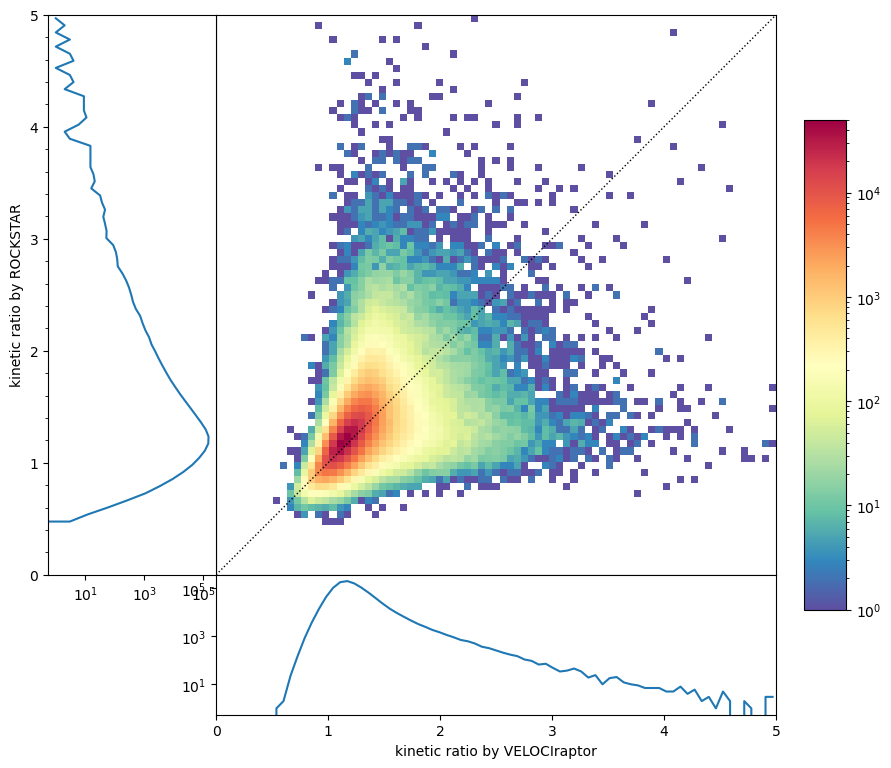

In [118]:
fig = plt.figure(figsize=(7*1.2,7))
ax = fig.add_axes([.2,.2,.8/1.2,.8])
rat_bins = np.linspace(0,5,80)
rat_bins_cen = (rat_bins[:-1]+rat_bins[1:])/2
hist_rs_vr = np.histogram2d(hal_vr_plot.kin_rat, hal_rs_plot.kin_rat, bins=rat_bins)
hist_rs = np.histogram(hal_rs_plot.kin_rat, bins=rat_bins)
hist_vr = np.histogram(hal_vr_plot.kin_rat, bins=rat_bins)
# print(hist)
im = ax.imshow(hist_rs_vr[0], norm=LogNorm(), extent=[rat_bins[0], rat_bins[-1],rat_bins[0], rat_bins[-1]], cmap='Spectral_r', origin='lower', aspect='auto')
# fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
ax.plot(rat_bins, rat_bins, 'k:', lw=1)
ax1x = fig.add_axes([.2,0,.8/1.2,.2], sharex=ax)
ax1y = fig.add_axes([0,.2,.2,.8], sharey=ax)
ax1x.plot(rat_bins_cen, hist_rs[0])
ax1x.set_yscale('log')
ax1x.set_xlabel('kinetic ratio by VELOCIraptor')
ax1y.plot(hist_vr[0], rat_bins_cen)
ax1y.set_xscale('log')
ax1y.set_ylabel('kinetic ratio by ROCKSTAR')
plt.minorticks_on()

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

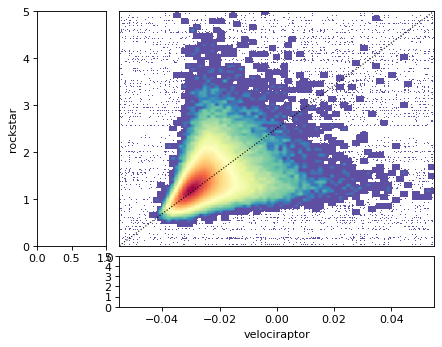

In [119]:
fig3 = plt.figure(dpi=80)
gs = fig3.add_gridspec(5, 5)
f3_ax = fig3.add_subplot(gs[:-1, 1:])
f3_ax.axes.xaxis.set_visible(False)
f3_ax.axes.yaxis.set_visible(False)
# f3_ax1.set_title('gs[0, :]')
rat_bins = np.linspace(0,5,80)
hist = np.histogram2d(hal_vr_plot.kin_rat, hal_rs_plot.kin_rat, bins=rat_bins)
# print(hist)
im = f3_ax.imshow(hist[0], norm=LogNorm(), extent=[rat_bins[0], rat_bins[-1],rat_bins[0], rat_bins[-1]], cmap='Spectral_r', origin='lower', aspect='auto')
# plt.colorbar(im, ax=ax)
f3_ax.plot(rat_bins, rat_bins, 'k:', lw=1)
f3_ax1x = fig3.add_subplot(gs[-1, 1:], sharey=f3_ax)
f3_ax1y = fig3.add_subplot(gs[:-1, 0], sharey=f3_ax)
f3_ax1x.set_xlabel('velociraptor')
f3_ax1y.set_ylabel('rockstar')
# plt.minorticks_on()
# ax1x = fig.add_subplot(2,2,1)
f3_ax1x.plot([],[])
plt.show()

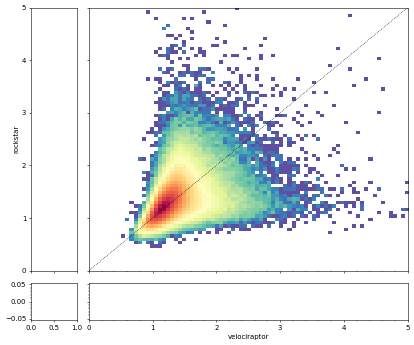

In [120]:
# fig = plt.figure(figsize=(7*1.2,7))
# ax = fig.add_subplot(2,4,(2,3,4))
fig, axes = plt.subplots(2,2, figsize=(7*1.2,7), dpi=50, gridspec_kw={'height_ratios': [7, 1], 'width_ratios': [1, 7]}, sharex='col', sharey='row', tight_layout=True)
ax = axes[0,1]
ax1y = axes[0,0]
ax1x = axes[1,1]
rat_bins = np.linspace(0,5,80)
hist = np.histogram2d(hal_vr_plot.kin_rat, hal_rs_plot.kin_rat, bins=rat_bins)
# print(hist)
im = ax.imshow(hist[0], norm=LogNorm(), extent=[rat_bins[0], rat_bins[-1],rat_bins[0], rat_bins[-1]], cmap='Spectral_r', origin='lower', aspect='auto')
# plt.colorbar(im, ax=ax)
ax.plot(rat_bins, rat_bins, 'k:', lw=1)
ax1x.set_xlabel('velociraptor')
ax1y.set_ylabel('rockstar')
plt.minorticks_on()

# ax1x = fig.add_subplot(2,2,1)
ax1x.plot([],[])
plt.show()

In [121]:
# cond = np.where(hal_vr_plot.Mass_BN98>1e13)
# hal_vr_plot = hal_vr_plot.iloc[cond]
# hal_rs_plot = hal_rs_plot.iloc[cond]

In [122]:
hal_vr_plot.Mass_BN98

ID
1          1.411986e+14
2          8.869735e+13
3          2.496418e+13
4          2.681914e+13
5          1.727059e+13
               ...     
1483983    1.974393e+10
1483984    1.869190e+10
1483985    1.781565e+10
1483986    1.632413e+10
1483987    1.416315e+10
Name: Mass_BN98, Length: 957410, dtype: float64

In [123]:
# pd.cut(hal_rs_plot.Mvir, bins=100)

In [124]:
# hal_vr_plot

In [125]:
%matplotlib widget

In [126]:
%matplotlib inline

In [127]:
# hal_rs_plot.sort_values('Mvir', inplace=True)

In [128]:
# hal_vr_plot.sort_values('Mass_BN98', inplace=True)

In [129]:
hal_rs_plot_grpd = hal_rs_plot.groupby(pd.cut(hal_rs_plot.Mvir, bins=np.logspace(11,14.5,50)))

In [130]:
hal_vr_plot_grpd = hal_vr_plot.groupby(pd.cut(hal_vr_plot.Mass_BN98, bins=np.logspace(11,14.5,50)))

Text(0, 0.5, 'VELOCIraptor')

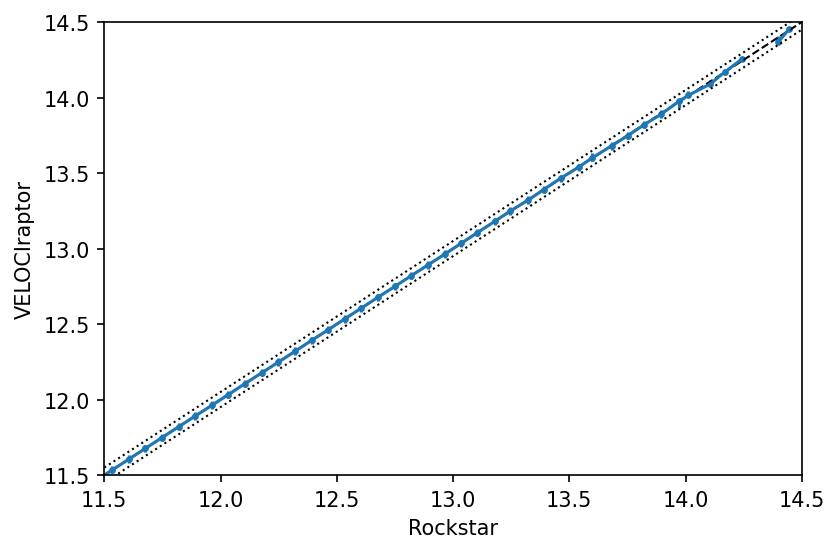

In [131]:
plt.figure(dpi=150)
plt.scatter(np.log10(hal_rs_plot_grpd.Mvir.median()), np.log10(hal_vr_plot_grpd.Mass_BN98.median()), s=5)
plt.errorbar(np.log10(hal_rs_plot_grpd.Mvir.median()), np.log10(hal_vr_plot_grpd.Mass_BN98.median()), yerr= [np.log10(hal_vr_plot_grpd.Mass_BN98.median())-np.log10(hal_vr_plot_grpd.Mass_BN98.quantile(.16)), np.log10(hal_vr_plot_grpd.Mass_BN98.quantile(.84))-np.log10(hal_vr_plot_grpd.Mass_BN98.median())])
# plt.scatter(np.log10(hal_rs_plot_grpd.Mvir.median()), np.log10(hal_vr_plot_grpd.Mass_BN98.quantile(.16)), s=5)
# plt.scatter(np.log10(hal_rs_plot_grpd.Mvir.median()), np.log10(hal_vr_plot_grpd.Mass_BN98.quantile(.84)), s=5)
scatrange = (11.5,14.5)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k--', lw=1)
plt.plot(scatranx,scatranx-0.05,'k:', lw=1)
plt.plot(scatranx,scatranx+0.05,'k:', lw=1)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

In [132]:
hal_plot_mass = pd.concat([hal_rs_plot.reset_index().Mvir,hal_vr_plot.reset_index().Mass_BN98], axis=1, keys=['rs','vr'])

In [133]:
hal_plot_mass_grpd = hal_plot_mass.groupby(pd.cut(hal_plot_mass.rs, bins=np.logspace(11,14.5,80)))

In [134]:
hal_plot_mass_grpd_median = hal_plot_mass_grpd.median()
hal_plot_mass_grpd_1sig_l = hal_plot_mass_grpd.quantile(.16)
hal_plot_mass_grpd_1sig_r = hal_plot_mass_grpd.quantile(.84)

Text(0, 0.5, 'VELOCIraptor')

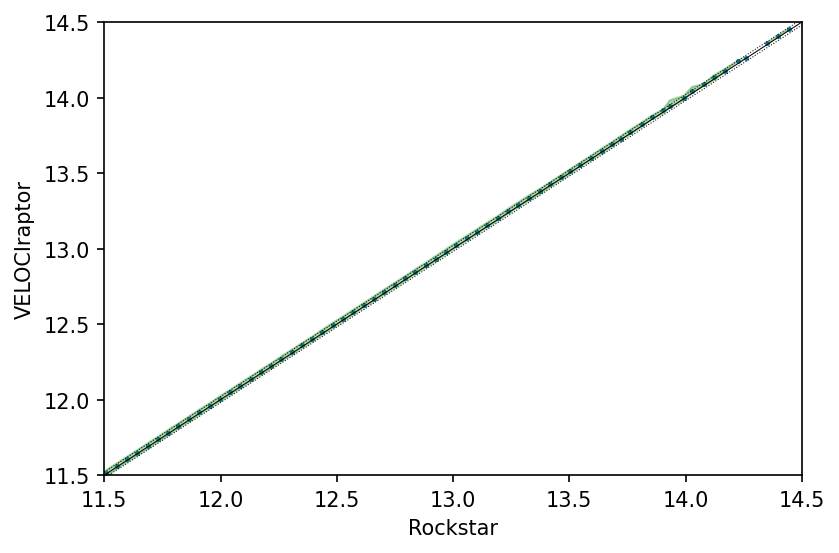

In [135]:
plt.figure(dpi=150)
plt.scatter(np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_median.vr), s=2)
# plt.errorbar(np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_median.vr), yerr= [np.log10(hal_plot_mass_grpd_median.vr)-np.log10(hal_plot_mass_grpd_1sig_l.vr), np.log10(hal_plot_mass_grpd_1sig_r.vr)-np.log10(hal_plot_mass_grpd_median.vr)])
plt.fill_between(np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_1sig_l.vr), np.log10(hal_plot_mass_grpd_1sig_r.vr), color='green', alpha=.3)
scatrange = (11.5,14.5)
plt.xlim(*scatrange)
plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx,'k-', lw=.5)
plt.plot(scatranx,scatranx-0.02,'k:', lw=.5)
plt.plot(scatranx,scatranx+0.02,'k:', lw=.5)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor')

Text(0, 0.5, 'VELOCIraptor-Rockstar')

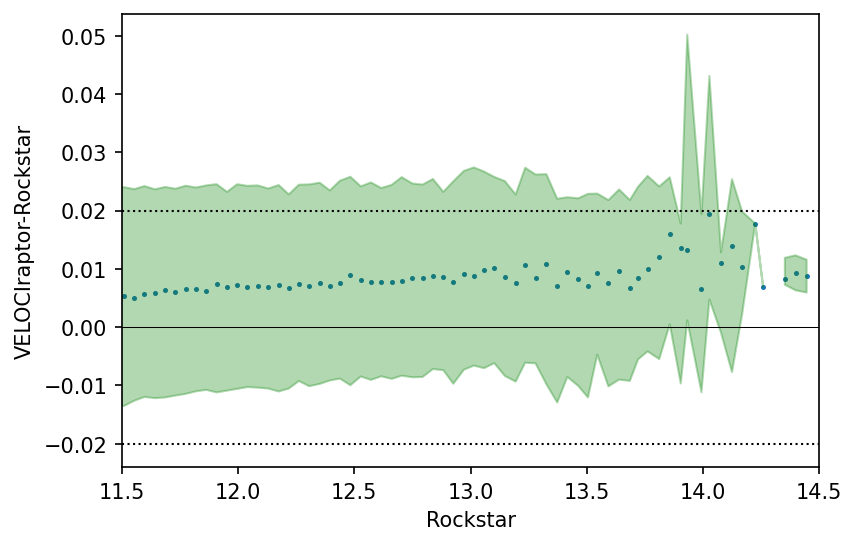

In [136]:
plt.figure(dpi=150)
plt.scatter(np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_median.vr)-np.log10(hal_plot_mass_grpd_median.rs), s=2)
# plt.errorbar(np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_median.vr), yerr= [np.log10(hal_plot_mass_grpd_median.vr)-np.log10(hal_plot_mass_grpd_1sig_l.vr), np.log10(hal_plot_mass_grpd_1sig_r.vr)-np.log10(hal_plot_mass_grpd_median.vr)])
plt.fill_between(np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_1sig_l.vr)-np.log10(hal_plot_mass_grpd_median.rs), np.log10(hal_plot_mass_grpd_1sig_r.vr)-np.log10(hal_plot_mass_grpd_median.rs), color='green', alpha=.3)
# plt.scatter(np.log10(hal_rs_matched_all_grpd.rs.median()), np.log10(hal_vr_matched_all_grpd.vr.quantile(.16)), s=5)
# plt.scatter(np.log10(hal_rs_matched_all_grpd.rs.median()), np.log10(hal_vr_matched_all_grpd.vr.quantile(.84)), s=5)
scatrange = (11.5,14.5)
plt.xlim(*scatrange)
# plt.ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
plt.plot(scatranx,scatranx*0,'k-', lw=.5)
plt.plot(scatranx,scatranx*0-0.02,'k:', lw=1)
plt.plot(scatranx,scatranx*0+0.02,'k:', lw=1)
plt.xlabel('Rockstar')
plt.ylabel('VELOCIraptor-Rockstar')

In [137]:
# y1 = np.exp(np.random.normal(size=100000,loc=0.24,scale=.1))

In [138]:
# plt.hist(y1, range=[0,3],bins=50)
# plt.show()

In [139]:
# err = np.random.normal(size=100000,loc=0,scale=0.3+0.1*y1)
# y2 = y1 + err

In [140]:
# smpldf = pd.DataFrame(np.vstack([y1,y2]).T,columns=['rs','vr'])

In [141]:
hal_plot_eta = pd.concat([hal_rs_plot.reset_index().kin_rat,hal_vr_plot.reset_index().kin_rat, hal_rs_plot.reset_index().Mvir], axis=1, keys=['rs','vr','Mrs'])

In [142]:
# hal_plot_eta = hal_plot_eta[hal_plot_eta.Mrs.between(1e12,1e13)]

In [143]:
rat_bins=np.unique(np.concatenate((np.linspace(0,5,80), np.linspace(0.8,1.4,20))))
rat_bins.sort()
rat_bins_cen = (rat_bins[:-1]+rat_bins[1:])/2

<ipython-input-144-edcffa792e46>:15: UserWarning: Log scale: values of z <= 0 have been masked
  im1 = ax.contour(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='Purples_r', origin='lower')


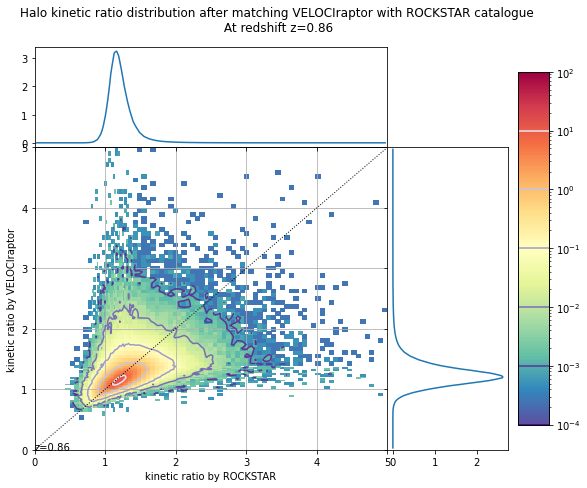

In [144]:
fig = plt.figure(figsize=(7*1.2,7))
ax = fig.add_axes([.1,.1,.7/1.2,.6])
ax1x = fig.add_axes([.1,.7,.7/1.2,.2], sharex=ax)
ax1y = fig.add_axes([.1+.7/1.2,.1,.2,.6], sharey=ax)
# fig = plt.figure(figsize=(7*1.2,7))
# ax = fig.add_axes([.2,.2,.8/1.2,.8])
hist_rs_vr = np.histogram2d(hal_plot_eta.rs, hal_plot_eta.vr, bins=rat_bins, density=True)
hist_rs = np.histogram(hal_plot_eta.rs, bins=rat_bins, density=True)
hist_vr = np.histogram(hal_plot_eta.vr, bins=rat_bins, density=True)
# print(hist)
X,Y = np.meshgrid(hist_rs_vr[1], hist_rs_vr[2])
im = ax.pcolor(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='Spectral_r')
# im = ax.imshow(hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), extent=[rat_bins[0], rat_bins[-1], rat_bins[0], rat_bins[-1]], cmap='jet', origin='lower', aspect='auto')
X,Y = np.meshgrid(hist_rs_vr[1][:-1]+hist_rs_vr[1][1:], hist_rs_vr[2][:-1]+hist_rs_vr[2][1:]); X/=2; Y/=2;
im1 = ax.contour(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='Purples_r', origin='lower')
# fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
fig.colorbar(im1, cax=cbar_ax)
ax.plot(rat_bins, rat_bins, 'k:', lw=1)
# ax1x = fig.add_axes([.2,0,.8/1.2,.2], sharex=ax)
# ax1y = fig.add_axes([0,.2,.2,.8], sharey=ax)
ax1x.plot(rat_bins_cen, hist_rs[0])
# ax1x.set_yscale('log')
ax.set_xlabel('kinetic ratio by ROCKSTAR')
ax1y.plot(hist_vr[0], rat_bins_cen)
# ax1y.set_xscale('log')
ax.set_ylabel('kinetic ratio by VELOCIraptor')
plt.minorticks_on()
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)
plt.setp(ax1x.get_xticklabels(), visible=False)
plt.setp(ax1y.get_yticklabels(), visible=False)
ax.grid(True,which='both',axis='both')
fig.suptitle(f"Halo kinetic ratio distribution after matching VELOCIraptor with ROCKSTAR catalogue\n At redshift z={z:.02g}")
fig.text(0.1,0.1,f'z={z:.02g}')
plt.savefig(f'plot_kinrat_hist2d-L{L:d}_N{N:d}_Cp18_{rund:s}_{i:03d}.pdf')
# plt.savefig(f'plot_kinrat_contour-L{L:d}_N{N:d}_Cp18_{rund:s}_{i:03d}.pdf')
plt.show()

In [145]:
bins=np.unique(np.concatenate((np.linspace(0.5,3,50), np.linspace(0.9,1.3,50))))
bins.sort()

In [146]:
hal_plot_eta_grpd_rs = hal_plot_eta.groupby(pd.cut(hal_plot_eta.rs, bins=bins))

In [147]:
hal_plot_eta_grpd_rs_median = hal_plot_eta_grpd_rs.median()
hal_plot_eta_grpd_rs_1sig_l = hal_plot_eta_grpd_rs.quantile(.16)
hal_plot_eta_grpd_rs_1sig_r = hal_plot_eta_grpd_rs.quantile(.84)

In [148]:
hal_plot_eta_grpd_vr = hal_plot_eta.groupby(pd.cut(hal_plot_eta.vr, bins=bins))

In [149]:
hal_plot_eta_grpd_vr_median = hal_plot_eta_grpd_vr.median()
hal_plot_eta_grpd_vr_1sig_l = hal_plot_eta_grpd_vr.quantile(.16)
hal_plot_eta_grpd_vr_1sig_r = hal_plot_eta_grpd_vr.quantile(.84)

In [150]:
# hal_plot_eta_grpd_rs_median.rs

In [151]:
# hal_plot_eta_grpd_rs.size()

In [152]:
# plt.close()
# plt.minorticks_off()

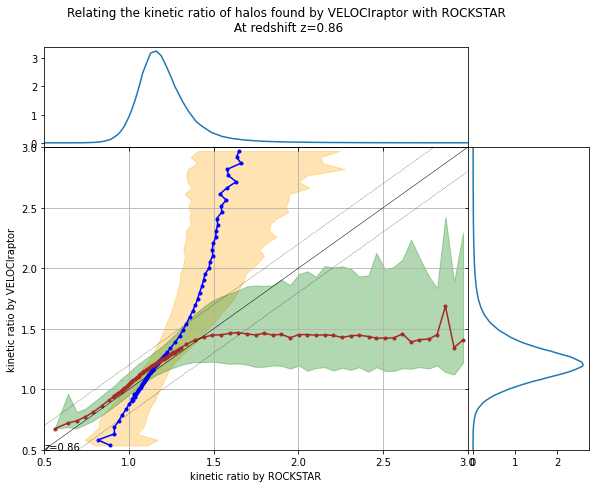

In [153]:
fig = plt.figure(figsize=(7*1.2,7))
ax = fig.add_axes([.1,.1,.7,.6])
ax1x = fig.add_axes([.1,.7,.7,.2], sharex=ax)
ax1y = fig.add_axes([.8,.1,.2,.6], sharey=ax)
ax.plot((hal_plot_eta_grpd_vr_median.rs), (hal_plot_eta_grpd_vr_median.vr), marker='o', markersize=3, c='blue')
# plt.errorbar((hal_plot_mass_grpd_median.vr), (hal_plot_mass_grpd_median.rs), yerr= [(hal_plot_mass_grpd_median.rs)-(hal_plot_mass_grpd_1sig_l.rs), (hal_plot_mass_grpd_1sig_r.rs)-(hal_plot_mass_grpd_median.rs)])
ax.fill_betweenx((hal_plot_eta_grpd_vr_median.vr), (hal_plot_eta_grpd_vr_1sig_l.rs), (hal_plot_eta_grpd_vr_1sig_r.rs), color='orange', alpha=.3)
ax.plot((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs_median.vr), marker='o', markersize=3, c='brown')
# plt.errorbar((hal_plot_mass_grpd_median.rs), (hal_plot_mass_grpd_median.vr), yerr= [(hal_plot_mass_grpd_median.vr)-(hal_plot_mass_grpd_1sig_l.vr), (hal_plot_mass_grpd_1sig_r.vr)-(hal_plot_mass_grpd_median.vr)])
ax.fill_between((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs_1sig_l.vr), (hal_plot_eta_grpd_rs_1sig_r.vr), color='green', alpha=.3)
scatrange = (.5,3)
ax.set_xlim(*scatrange)
ax.set_ylim(*scatrange)
# ax1y.set_ylim(*scatrange)
# ax1x.set_xlim(*scatrange)
scatranx = np.linspace(*scatrange,10)
ax.plot(scatranx,scatranx,'k-', lw=.5)
ax.plot(scatranx,scatranx-0.2,'k:', lw=.5)
ax.plot(scatranx,scatranx+0.2,'k:', lw=.5)
# rat_bins = np.linspace(0,5,80)
# rat_bins_cen = (rat_bins[:-1]+rat_bins[1:])/2
hist_rs_vr = np.histogram2d(hal_plot_eta.rs, hal_plot_eta.vr, bins=rat_bins, density=True)
hist_rs = np.histogram(hal_plot_eta.rs, bins=rat_bins, density=True)
hist_vr = np.histogram(hal_plot_eta.vr, bins=rat_bins, density=True)
ax1x.plot(rat_bins_cen, hist_rs[0])
# ax1x.plot((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs.size()), marker='o', markersize=3)
# ax1x.set_yscale('log')
ax.set_xlabel('kinetic ratio by ROCKSTAR')
ax1y.plot(hist_vr[0], rat_bins_cen)
# ax1y.plot(hal_plot_eta_grpd_vr.count(), hal_plot_eta_grpd_vr_median.vr, marker='o', markersize=3)
# ax1y.set_xscale('log')
ax.set_ylabel('kinetic ratio by VELOCIraptor')
# plt.minorticks_on()
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)
plt.setp(ax1x.get_xticklabels(), visible=False)
plt.setp(ax1y.get_yticklabels(), visible=False)
ax.grid(True,which='both',axis='both')
# ax2.hist(y1, range=[0,3],bins=100, weights=3*np.ones(y1.shape[0]))
# axx.set_title('halo distribution')
fig.suptitle(f"Relating the kinetic ratio of halos found by VELOCIraptor with ROCKSTAR\n At redshift z={z:.02g}")
fig.text(0.1,0.1,f'z={z:.02g}')
plt.savefig(f'plot_kinrat_stat-L{L:d}_N{N:d}_Cp18_{rund:s}_{i:03d}.pdf')
plt.show()

<ipython-input-155-bab3093b3b7c>:15: UserWarning: Log scale: values of z <= 0 have been masked
  im1 = ax.contour(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='viridis', origin='lower', linestyle='dashdot')
<ipython-input-155-bab3093b3b7c>:15: UserWarning: The following kwargs were not used by contour: 'linestyle'
  im1 = ax.contour(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='viridis', origin='lower', linestyle='dashdot')


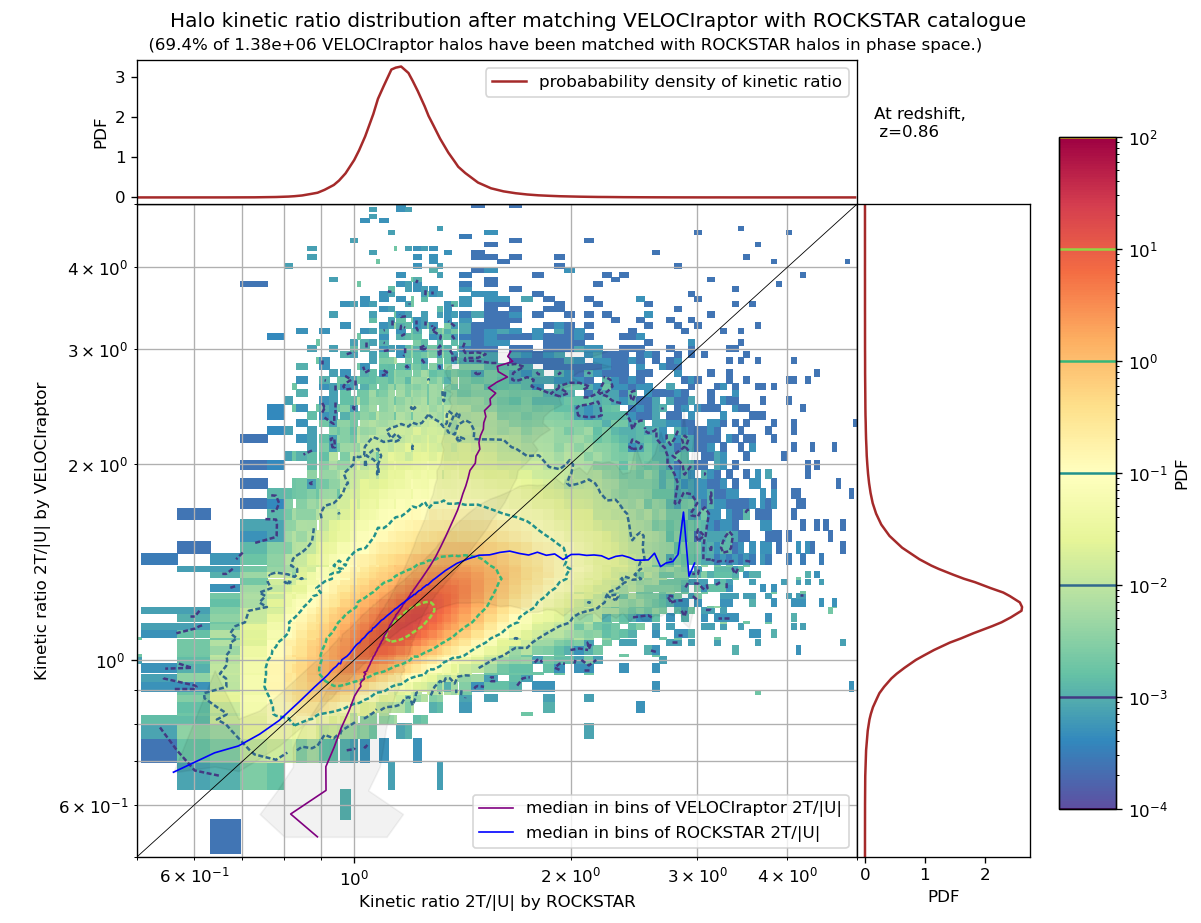

In [155]:
fig = plt.figure(figsize=(8*1.2,8), dpi=120)
ax = fig.add_axes([.1,.1,.75/1.2,.68])
ax1x = fig.add_axes([.1,.78,.75/1.2,.15], sharex=ax)
ax1y = fig.add_axes([.1+.75/1.2,.1,.15,.68], sharey=ax)
# fig = plt.figure(figsize=(7*1.2,7))
# ax = fig.add_axes([.2,.2,.8/1.2,.8])
hist_rs_vr = np.histogram2d(hal_plot_eta.rs, hal_plot_eta.vr, bins=rat_bins, density=True)
hist_rs = np.histogram(hal_plot_eta.rs, bins=rat_bins, density=True)
hist_vr = np.histogram(hal_plot_eta.vr, bins=rat_bins, density=True)
# print(hist)
X,Y = np.meshgrid(hist_rs_vr[1], hist_rs_vr[2])
im = ax.pcolor(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='Spectral_r')
# im = ax.imshow(hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), extent=[rat_bins[0], rat_bins[-1], rat_bins[0], rat_bins[-1]], cmap='jet', origin='lower', aspect='auto')
X,Y = np.meshgrid(hist_rs_vr[1][:-1]+hist_rs_vr[1][1:], hist_rs_vr[2][:-1]+hist_rs_vr[2][1:]); X/=2; Y/=2;
im1 = ax.contour(X,Y, hist_rs_vr[0], norm=LogNorm(vmin=1e-4,vmax=1e2), cmap='viridis', origin='lower', linestyle='dashdot')
# fig.subplots_adjust(right=0.8)

for c in im1.collections:
    c.set_dashes([(0, (2.0, 1.0))])
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cb1 = fig.colorbar(im, cax=cbar_ax)
cb2 = fig.colorbar(im1, cax=cbar_ax)
cb2.set_label('PDF')
# ax.plot(rat_bins, rat_bins, 'k:', lw=1)
ax.plot((hal_plot_eta_grpd_vr_median.rs), (hal_plot_eta_grpd_vr_median.vr), markersize=3, lw=1, c='purple', label='median in bins of VELOCIraptor 2T/|U|')
# # plt.errorbar((hal_plot_mass_grpd_median.vr), (hal_plot_mass_grpd_median.rs), yerr= [(hal_plot_mass_grpd_median.rs)-(hal_plot_mass_grpd_1sig_l.rs), (hal_plot_mass_grpd_1sig_r.rs)-(hal_plot_mass_grpd_median.rs)])
ax.fill_betweenx((hal_plot_eta_grpd_vr_median.vr), (hal_plot_eta_grpd_vr_1sig_l.rs), (hal_plot_eta_grpd_vr_1sig_r.rs), color='k', alpha=.05)
# ax.plot((hal_plot_eta_grpd_vr_1sig_l.rs), (hal_plot_eta_grpd_vr_median.vr), markersize=3, ls='dashed', lw=1, c='blue')
# ax.plot((hal_plot_eta_grpd_vr_1sig_r.rs), (hal_plot_eta_grpd_vr_median.vr), markersize=3, ls='dashed', lw=1, c='blue')

ax.plot((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs_median.vr), markersize=3, lw=1, c='blue', label='median in bins of ROCKSTAR 2T/|U|')
# # plt.errorbar((hal_plot_mass_grpd_median.rs), (hal_plot_mass_grpd_median.vr), yerr= [(hal_plot_mass_grpd_median.vr)-(hal_plot_mass_grpd_1sig_l.vr), (hal_plot_mass_grpd_1sig_r.vr)-(hal_plot_mass_grpd_median.vr)])
ax.fill_between((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs_1sig_l.vr), (hal_plot_eta_grpd_rs_1sig_r.vr), color='k', alpha=.05)
# ax.plot((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs_1sig_l.vr), markersize=3, ls='dashed', lw=1, c='darkgreen')
# ax.plot((hal_plot_eta_grpd_rs_median.rs), (hal_plot_eta_grpd_rs_1sig_r.vr), markersize=3, ls='dashed', lw=1, c='darkgreen')
scatrange = (.5,5)
ax.set_xlim(*scatrange)
ax.set_ylim(*scatrange)
# ax1y.set_ylim(*scatrange)
# ax1x.set_xlim(*scatrange)
scatranx = np.linspace(*scatrange,10)
ax.plot(scatranx,scatranx,'k', lw=.5)
# ax.plot(scatranx,scatranx-0.3,'k:', lw=.5)
# ax.plot(scatranx,scatranx+0.3,'k:', lw=.5)
# ax1x = fig.add_axes([.2,0,.8/1.2,.2], sharex=ax)
# ax1y = fig.add_axes([0,.2,.2,.8], sharey=ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax1x.plot(rat_bins_cen, hist_rs[0], label='probabability density of kinetic ratio', c='brown')
# ax1x.set_yscale('log')
ax1x.set_ylabel('PDF')
ax.set_xlabel('Kinetic ratio 2T/|U| by ROCKSTAR')
ax1y.plot(hist_vr[0], rat_bins_cen, c='brown')
# ax1y.set_xscale('log')
ax1y.set_xlabel('PDF')
ax.set_ylabel('Kinetic ratio 2T/|U| by VELOCIraptor')
plt.minorticks_on()
ax1x.axes.xaxis.set_visible(False)
ax1y.axes.yaxis.set_visible(False)
plt.setp(ax1x.get_xticklabels(), visible=False)
plt.setp(ax1y.get_yticklabels(), visible=False)
ax.grid(True,which='both',axis='both')
fig.suptitle(f"Halo kinetic ratio distribution after matching VELOCIraptor with ROCKSTAR catalogue")#\n Matched halo from ROCKSTAR catalog have been assigned for {match_frac_all:.1%} of {hal_vr_all.shape[0]:d} halos found by VELOCIraptor.") #halos have been matched each with a ROCKSTAR halo")
ax1x.set_title(f"                          ({match_frac_all:.1%} of {hal_vr_all.shape[0]:.2e} VELOCIraptor halos have been matched with ROCKSTAR halos in phase space.)", fontsize=10)
fig.text(0.74,0.85,f'At redshift,\n z={z:.02g}')
ax.legend(loc='lower right')
ax1x.legend()
plt.savefig(f'plot_kinrat_hist2d-L{L:d}_N{N:d}_Cp18_{rund:s}_{i:03d}.pdf')
# plt.savefig(f'plot_kinrat_contour-L{L:d}_N{N:d}_Cp18_{rund:s}_{i:03d}.pdf')
plt.show()

In [155]:
fig.text('')

TypeError: text() missing 2 required positional arguments: 'y' and 's'

In [ ]:
# hal_plot_eta_grpd_vr_median

In [ ]:
# hal_plot_eta_grpd_vr.size()

In [ ]:
fig1, ax1 = plt.subplots(1, dpi=200)
ax1.plot((hal_plot_eta_grpd_vr_median.vr), (hal_plot_eta_grpd_vr_median.rs), marker='o', markersize=3)
# plt.errorbar((hal_plot_mass_grpd_median.vr), (hal_plot_mass_grpd_median.rs), yerr= [(hal_plot_mass_grpd_median.rs)-(hal_plot_mass_grpd_1sig_l.rs), (hal_plot_mass_grpd_1sig_r.rs)-(hal_plot_mass_grpd_median.rs)])
ax1.fill_between((hal_plot_eta_grpd_vr_median.vr), (hal_plot_eta_grpd_vr_1sig_l.rs), (hal_plot_eta_grpd_vr_1sig_r.rs), color='green', alpha=.3)
scatrange = (.5,3)
ax1.set_xlim(*scatrange)
ax1.set_ylim(*scatrange)
scatranx = np.linspace(*scatrange,10)
ax1.plot(scatranx,scatranx,'k-', lw=.5)
ax1.plot(scatranx,scatranx-0.2,'k:', lw=.5)
ax1.plot(scatranx,scatranx+0.2,'k:', lw=.5)
ax1.set_ylabel('Rockstar')
ax1.set_xlabel('VELOCIraptor')
ax2 = ax1.twinx()
# ax2.plot((hal_plot_eta_grpd_vr_median.vr), (hal_plot_eta_grpd_vr.count()), marker='o', markersize=3)
plt.savefig(f'kinrat-plot.pdf')

In [ ]:
break

In [ ]:
snap = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0")

In [ ]:
posd = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/r1/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=8)

In [ ]:
deltad = assign_density(posd, L, scheme='CIC')#, overdensity=False)

In [ ]:
# deltab = assign_density(posb, L, scheme='NGP')

In [ ]:
deltad_slice = deltad[:,:,250:260].mean(axis=2)

In [ ]:
deltad_slice = deltad[:256]

In [ ]:
# deltab_slice = deltab[100:150].mean(axis=0)

In [ ]:
# deltad_slice

In [ ]:
# vmin=5e-2,vmax=5e2

In [ ]:
fig1, ax1 = plt.subplots(1,1, figsize=(7.5,4), dpi=150)
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-3,vmax=2e2), cmap='inferno')
cb1 = fig1.colorbar(im1,ax=ax1)
cb1.set_label(r"$(1+\delta)$")

In [ ]:
# match_idx_all_spl = match_idx_all.sample(100000, random_state=20)
hal_vr_matched = hal_vr_all.loc[match_idx_all['vr']]
# hal_rs_matched = hal_rs_all.loc[match_idx_all_spl['rs']]

In [ ]:
hal_vr_plot = hal_vr_matched
# hal_rs_plot = hal_rs_matched

In [ ]:
hal_vr_plot = hal_vr_plot.loc[hal_vr_plot.Zc.between(73.24,76.17)]
hal_vr_plot = hal_vr_plot.loc[hal_vr_plot.Mass_BN98.between(2e12,1e15)]

In [ ]:
scale_r = 4

In [ ]:
# hal_vr_plot.Mass_BN98/(4*np.pi/3*hal_vr_plot.R_BN98**3)/mean_dens_comov#/(4*np.pi/3*hal_vr_plot.R_BN98**3)/mean_dens_comov

In [ ]:
fig, ax1 = plt.subplots(1, dpi=200, figsize=(12*1.2,12))
ax1.set_aspect('equal')
# g1 = ax1.scatter(hal_rs_plot.X, hal_rs_plot.Y, c=hal_rs_plot.Z, s=(4.0176*2*scale_r*hal_rs_plot.Rvir)**2/1e6, marker='o', cmap='jet')
g2 = ax1.scatter(hal_vr_plot.Xc, hal_vr_plot.Yc, c=hal_vr_plot.Mass_BN98, norm=LogNorm(vmin=2e12,vmax=5e13), s=(4.0176*2*scale_r*hal_vr_plot.R_BN98)**2, marker='o', cmap='jet')
# g1.set_facecolor('none')
g2.set_facecolor('none')
ax1.set_xlim(-5,155)
ax1.set_ylim(-5,155)
g0 = ax1.scatter(0,0,c=75,s=(4.0176*2*10)**2, marker='+')
g0.set_facecolor('none')
fig.colorbar(g2, ax=ax1)
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-3,vmax=5e1), origin='upper', cmap='jet', extent=(0,150,0,150))
cb2 = fig.colorbar(im1,ax=ax1)
cb2.set_label(r"$(1+\delta)$")
(ax1.get_window_extent().width  / (160) * 72./fig.dpi)
# print(3*hal_rs_plot.Rvir)

In [ ]:
(ax1.get_window_extent().width  / (160) * 72./fig.dpi) ** 2

In [ ]:
ax1.get_window_extent().height